## Install

In [ ]:
!python -m spacy download es_core_news_sm
!pip install spacy[transformers]
!pip install mglearn
!python -m spacy download es_dep_news_trf
!pip install mglearn
!pip install pyLDAvis
#!pip install pyLDAvis.gensim

2022-10-05 12:46:06.737647: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 757 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 4.7 MB 13.7 MB/s 
     |████████████████████████████████| 1.1 MB 55.1 MB/s 
     |████████████████████████████████| 163 kB 57.8 MB/s 
     |████████████████████████████████| 6.6 MB 40.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 7.4 MB/s 
  Created wheel for mglearn: filenam

# Librerias

In [ ]:
import pandas as pd
import spacy
from google.colab import drive
from nltk import word_tokenize
from nltk import SnowballStemmer
import nltk
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import mglearn
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import corpora, models
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors
from bokeh.core.enums import MarkerType
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
nltk.download('punkt')

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


# Importamos Videos, Comentarios o Respuestas Comentarios

In [ ]:
# ======================== OJO Modificar para cada serie ========================

pathVD='/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/SEARCHES/YoutubeResults/Series/\
Narcos/Comentarios/RESULTS-PAISCOMENTARIOS-Lematizado2022-09-13 17_51_55.913996.csv'

# ======================== OJO Modificar para cada serie ========================

dfVD= pd.read_csv(pathVD)
dfVD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72493 entries, 0 to 72492
Data columns (total 22 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   idVideo                                          72493 non-null  object
 1   idComentarioPrincipal                            72493 non-null  object
 2   TextoComentarioPrincipal                         72490 non-null  object
 3   ComentarioPrincipalModificado                    72493 non-null  object
 4   emojisComentarioPrincipal                        72493 non-null  object
 5   URLsComentarioPrincipal                          72493 non-null  object
 6   hashtagsComentarioPrincipal                      72493 non-null  object
 7   MencionesComentarioPrincipal                     72493 non-null  object
 8   LikesComentarioPrincipal                         72493 non-null  int64 
 9   ReplicasTotalesComentarioPrincipal     

# Lematizacion (Si no se ha hecho, algo demorada)

## Lematizacion Profunda

In [ ]:
nlp = spacy.load("es_dep_news_trf")
nlp

In [ ]:
def lematizarprofundo(texto):
  doc_spacy = nlp(texto)
  tokens_lema= " ".join([token.lemma_ for token in doc_spacy])
  return tokens_lema

In [ ]:
dfVD['TotalTextoVideoModificadoLematizadoProfundo']=dfVD['TotalTextoVideoModificado'].apply(lematizarprofundo)

/usr/local/lib/python3.7/dist-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [ ]:
dfVD['TotalTextoVideoModificadoLematizadoProfundo'][0]

'escobar traicion loving pablo trailer subtitulado hd pelicula basado libro amando pablo odiar escobar virgina vallejo loving pablo narrar ascenso caido mayor narcotraficante historia pablo escobar apasionado tormentós aventura amoroso periodista colombiano famoso momento virginia vallejo traves reinado terror destrozo pais entero escobar traicion loving pablo javier bardem penelope cruz pelicula drama pelicula crimen amar pablo odiar escobar cinemex cinepolis'

## Lematizacion Debil

In [ ]:
es_nlp = spacy.load('es_core_news_sm')
es_nlp

In [ ]:
def lematizar(texto):
  doc_spacy = es_nlp(texto)
  tokens_lema= " ".join([token.lemma_ for token in doc_spacy])
  return tokens_lema

In [ ]:
dfVD['TotalTextoVideoModificadoLematizado']=dfVD['TotalTextoVideoModificado'].apply(lematizar)

In [ ]:
dfVD['TotalTextoVideoModificadoLematizado'][0]

'escobar traicion loving pablo trailer subtitulado hd pelicula basado libro amar pablo odiar escobar virgina vallejo loving pablo narrar ascenso caido mayor narcotraficante historio pablo escobar apasionado tormentós aventura amoroso periodista colombiano famoso momento virginia vallejo trav reinado terror destrozo pais entero escobar traicion loving pablo javier bardem penelope cruz peliculas dramar peliculas crimir amar pablo odiar escobar cinemex cinepoli'

In [ ]:
dfVD['TotalTextoVideoModificado'][0]

'escobar traicion loving pablo trailer subtitulado hd pelicula basada libro amando pablo odiando escobar virgina vallejo loving pablo narra ascenso caida mayores narcotraficantes historia pablo escobar apasionada tormentosa aventura amorosa periodista colombiana famosa momento virginia vallejo traves reinado terror destrozo pais entero escobar traicion loving pablo javier bardem penelope cruz peliculas drama peliculas crimen amando pablo odiando escobar cinemex cinepolis'

# LDA

## LDA con Gensim

### Preprocesamiento de datos

In [ ]:
columna='ComentarioPrincipalModificadoLematizadoProfundo' # 'TotalTextoVideoModificadoLematizadoProfundo', 'ComentarioPrincipalModificadoLematizadoProfundo' , 'ComentarioRespuestaModificadoLematizadoProfundo'

In [ ]:
#dfVD[columna] = dfVD[columna].apply(str.replace, args=('ano', 'año'))

#### Preparamos datos

In [ ]:
def tokenizar(texto):
  return word_tokenize(texto)

In [ ]:
dfVD['Tokenizado']=dfVD[columna].apply(tokenizar)
dfVD['Tokenizado']

0                   [serie, deberia, llamar, él, parasito]
1        [actor, encarnar, pablo, escobar, practicament...
2                                                [saludoz]
3                                                [saludoz]
4                                                 [saludo]
                               ...                        
72488       [quica, blackie, poison, limon, velazco, pros]
72489                [aparecer, alias, mugre, dar, cuenta]
72490                      [mejor, blackie, junto, poison]
72491     [rojo, mismo, actor, hacer, poncho, patron, mal]
72492    [leal, mejor, navegante, cali, infiltro, lacra...
Name: Tokenizado, Length: 72493, dtype: object

In [ ]:
Tokenizado=list(dfVD['Tokenizado'])
print(Tokenizado)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### Crear el diccionario (bolsa de palabras y TF-IDF) para el modelado de temas

In [ ]:
# Diccionario o vector de caracteristicas
id2word = corpora.Dictionary(Tokenizado)
count = 0
for k, v in id2word.iteritems():
  print(k, v)
  count += 1
  if count > 10:
      break

0 deberia
1 llamar
2 parasito
3 serie
4 él
5 actor
6 agradable
7 cambio
8 encarnar
9 escobar
10 pablo


In [ ]:
# Cantidad de vocabulario
len(id2word)

52379

#### Representacion bolsa de palabras (corpus)

In [ ]:
# Crear Corpus
texts = Tokenizado
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(corpus)

72493

In [ ]:
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]


In [ ]:
len(corpus[0])

5

In [ ]:
corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]

In [ ]:
len(corpus[:1])

1

In [ ]:
# Termino-Frecuencia  para primer video
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('deberia', 1), ('llamar', 1), ('parasito', 1), ('serie', 1), ('él', 1)]]

#### Representacion TF-IDF (corpus)

In [ ]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
corpus_tfidf

In [ ]:
len(corpus_tfidf[0])

5

In [ ]:
print(corpus_tfidf[0])

[(0, 0.4662854697247623), (1, 0.36559350226072207), (2, 0.736333792494673), (3, 0.17619825523690205), (4, 0.27511083713692636)]


j=1
for doc in corpus_tfidf:
  print("video numero ",j)
  pprint(doc)
  j=j+1

#### Bigramas

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(texts, min_count=1, delimiter=b' ') # higher threshold fewer phrases.

In [ ]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [ ]:
len(texts[0])

5

In [ ]:
texts[0]

['serie', 'deberia', 'llamar', 'él', 'parasito']

In [ ]:
len(bigram_mod[texts[0]])

4

In [ ]:
# See bigram example
print(bigram_mod[texts[0]])

['serie', 'deberia llamar', 'él', 'parasito']


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [ ]:
# Form Bigrams
data_words_bigrams = make_bigrams(texts)
data_words_bigrams

[['serie', 'deberia llamar', 'él', 'parasito'],
 ['actor',
  'encarnar',
  'pablo escobar',
  'practicamente',
  'rostro',
  'agradable',
  'cambio',
  'verdadero',
  'sicopata'],
 ['saludoz'],
 ['saludoz'],
 ['saludo'],
 ['saludo'],
 ['ver',
  'produccion colombiano',
  'patron mal',
  'fotografiar',
  'bien',
  'voz',
  'pesima',
  'colombiano'],
 ['pablo',
  'corrompio',
  'politicos',
  'man',
  'conocer',
  'colombia',
  'comparado',
  'politico pais',
  'pablo',
  'qeda',
  'bien parado',
  'ome'],
 ['aaggg', 'cancer', 'actor', 'mejor', 'espanol', 'adres', 'verga', 'actor'],
 ['peor error',
  'serie fabuladoro',
  'mentirós lleno',
  'error invento',
  'cuadro',
  'ver despacho',
  'presidencial casa',
  'gobierno',
  'mismo procer',
  'argentino distinguir',
  'claramente juan',
  'manuel rosas',
  'mariano moreno',
  'jose san',
  'martin bartolome',
  'mitre siquiera',
  'colombiano reparar',
  'él'],
 ['ristorante', 'droga', 'droga', 'pute', 'droga'],
 ['encantado', 'intro', 

#### Crear el diccionario (bigramas) para el modelado de temas

In [ ]:
# Create Dictionary 
id2word_bigrams = corpora.Dictionary(data_words_bigrams) 
len(id2word_bigrams)

69266

#### Representacion bigramas (Corpus)

In [ ]:
# Create Corpus 
texts_bigrams = data_words_bigrams
# Term Document Frequency 
corpus_bigrams = [id2word_bigrams.doc2bow(text) for text in texts_bigrams]  
# View 
print(corpus_bigrams[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [ ]:
len(corpus_bigrams[0])

4

In [ ]:
len(corpus_bigrams)

72493

### Numero optimo de temas para LDA (Solo si no se ha ejecutado)

In [ ]:
serie='Narcos' # 'EscobarPatrondelMal', 'Dignity', 'Narcos', 'Los80,MasqueUnaModa', 'TresCaines'
carpeta='Comentarios' # 'Videos', 'Comentarios', 'RespuestasComentarios'
datos='comentarios' # 'respuestas en comentarios', 'comentarios', 'videos con ruido'
tv='Narcos' #'EPM', 'Narcos', 'Dignity', 'Los 80', 'Tres Caines'

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=6):
  """
  Compute c_v coherence for various number of topics


  Parameters:
  ----------
  dictionary : Gensim dictionary
  corpus : Gensim corpus
  texts : List of input texts
  limit : Max num of topics

  Returns:
  -------
  model_list : List of LDA topic models
  coherence_values : Coherence values corresponding to the LDA model with respective number of topics
  """
  coherence_values = []
  model_list = []
  for num_topics in range(start, limit, step):
      model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,iterations=50,random_state=100,passes=20)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())

  return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list1, coherence_values1 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=Tokenizado, start=2, limit=40, step=2)

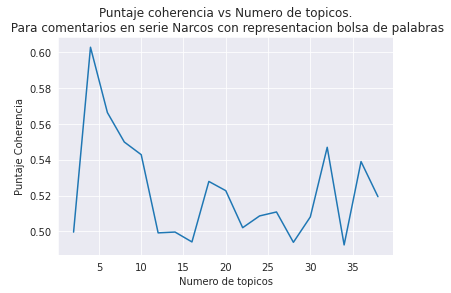

In [ ]:
# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.title("Puntaje coherencia vs Numero de topicos.\n Para {} en serie {} con representacion bolsa de palabras".format(datos,tv))
plt.plot(x, coherence_values1)
plt.xlabel("Numero de topicos")
plt.ylabel("Puntaje Coherencia")
plt.savefig("/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/DOCUMENTS/YoutubeReport/"+carpeta+"/ModelToping/"+serie+"/NumeroTopicosRepresentacionBolsaPalabras"+carpeta+serie+".png",bbox_inches='tight')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values1):
    print("Numero de topicos =", m, " Con un valor de coherencia de", round(cv, 4))

Numero de topicos = 2  Con un valor de coherencia de 0.4996
Numero de topicos = 4  Con un valor de coherencia de 0.6027
Numero de topicos = 6  Con un valor de coherencia de 0.5663
Numero de topicos = 8  Con un valor de coherencia de 0.5498
Numero de topicos = 10  Con un valor de coherencia de 0.5428
Numero de topicos = 12  Con un valor de coherencia de 0.4992
Numero de topicos = 14  Con un valor de coherencia de 0.4996
Numero de topicos = 16  Con un valor de coherencia de 0.4941
Numero de topicos = 18  Con un valor de coherencia de 0.5278
Numero de topicos = 20  Con un valor de coherencia de 0.5227
Numero de topicos = 22  Con un valor de coherencia de 0.502
Numero de topicos = 24  Con un valor de coherencia de 0.5086
Numero de topicos = 26  Con un valor de coherencia de 0.5108
Numero de topicos = 28  Con un valor de coherencia de 0.4939
Numero de topicos = 30  Con un valor de coherencia de 0.508
Numero de topicos = 32  Con un valor de coherencia de 0.5469
Numero de topicos = 34  Con un

In [ ]:
# Select the model and print the topics
optimal_model1 = model_list1[3]
model_topics1 = optimal_model1.show_topics(formatted=False)
print(optimal_model1.print_topics(num_words=10))

[(0, '0.030*"song" + 0.014*"alguien" + 0.013*"love" + 0.013*"narcos" + 0.012*"cancion" + 0.010*"policia" + 0.010*"paso" + 0.010*"spanish" + 0.009*"jajaja" + 0.009*"im"'), (1, '0.012*"serie" + 0.012*"paisa" + 0.011*"netflix" + 0.010*"nao" + 0.009*"ja" + 0.007*"fucking" + 0.007*"vi" + 0.007*"favor" + 0.007*"negro" + 0.007*"decia"'), (2, '0.063*"serie" + 0.043*"pablo" + 0.037*"patron" + 0.035*"escobar" + 0.032*"mal" + 0.030*"mejor" + 0.016*"colombiano" + 0.016*"narcos" + 0.015*"hablar" + 0.013*"hacer"'), (3, '0.024*"played" + 0.017*"seguir" + 0.016*"murio" + 0.011*"ficcion" + 0.010*"sicario" + 0.010*"igual" + 0.009*"gustavo" + 0.009*"muerto" + 0.008*"politico" + 0.008*"guy"'), (4, '0.027*"si" + 0.025*"decir" + 0.020*"popeye" + 0.017*"él" + 0.016*"poder" + 0.016*"hacer" + 0.014*"ver" + 0.013*"buen" + 0.012*"matar" + 0.011*"solo"'), (5, '0.074*"binod" + 0.022*"badal" + 0.012*"name" + 0.011*"life" + 0.008*"pepes" + 0.007*"dember" + 0.007*"rip" + 0.007*"usted" + 0.007*"foto" + 0.006*"mandar"'

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model1, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.274256 -0.216940       1        1  17.897277
2      0.286125  0.085981       2        1  16.807491
0     -0.102812  0.047309       3        1  12.979778
7      0.032704  0.341068       4        1  12.597435
1     -0.051562 -0.095773       5        1  11.906088
5     -0.148784 -0.082370       6        1  10.898951
6     -0.151834 -0.033780       7        1   8.492513
3     -0.138093 -0.045495       8        1   8.420467, topic_info=          Term         Freq        Total Category  logprob  loglift
10       pablo  8541.000000  8541.000000  Default  30.0000  30.0000
22806    binod  4089.000000  4089.000000  Default  29.0000  29.0000
3        serie  6018.000000  6018.000000  Default  28.0000  28.0000
9      escobar  6184.000000  6184.000000  Default  27.0000  27.0000
21      patron  3145.000000  3145.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
4032     tomar   145.165528   146.115075   Topic8  -5.6773   2.4680
1223   gustavo   400.887749   563.194376   Topic8  -4.6615   2.1346
1734   hermano   209.481874   274.183636   Topic8  -5.3106   2.2053
129     cartel   328.710019  1286.543825   Topic8  -4.8600   1.1100
172       pena   185.449359   343.061917   Topic8  -5.4324   1.8594

[337 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1906      4  0.995303    accent
1524      4  0.999467    acento
5         4  0.999457     actor
4848      5  0.997194    actors
4849      5  0.997815  actually
...     ...       ...       ...
3336      6  0.996236     whats
171       3  0.997662     would
3109      6  0.997449        xq
4782      6  0.996479     youre
4         1  0.999218        él

[356 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 8, 2, 6, 7, 4])

In [ ]:
model_list2, coherence_values2 = compute_coherence_values(dictionary=id2word, corpus=corpus_tfidf, texts=Tokenizado, start=2, limit=40, step=2)

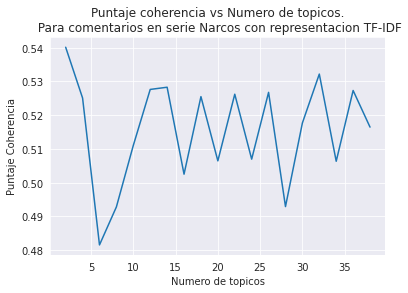

In [ ]:
# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.title("Puntaje coherencia vs Numero de topicos.\n Para {} en serie {} con representacion TF-IDF".format(datos,tv))
plt.plot(x, coherence_values2)
plt.xlabel("Numero de topicos")
plt.ylabel("Puntaje Coherencia")
plt.savefig("/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/DOCUMENTS/YoutubeReport/"+carpeta+"/ModelToping/"+serie+"/NumeroTopicosRepresentacionTF-IDF"+carpeta+serie+".png",bbox_inches='tight')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values2):
    print("Numero de topicos =", m, " Con un valor de coherencia de", round(cv, 4))

Numero de topicos = 2  Con un valor de coherencia de 0.5401
Numero de topicos = 4  Con un valor de coherencia de 0.5251
Numero de topicos = 6  Con un valor de coherencia de 0.4816
Numero de topicos = 8  Con un valor de coherencia de 0.4928
Numero de topicos = 10  Con un valor de coherencia de 0.511
Numero de topicos = 12  Con un valor de coherencia de 0.5276
Numero de topicos = 14  Con un valor de coherencia de 0.5283
Numero de topicos = 16  Con un valor de coherencia de 0.5025
Numero de topicos = 18  Con un valor de coherencia de 0.5255
Numero de topicos = 20  Con un valor de coherencia de 0.5065
Numero de topicos = 22  Con un valor de coherencia de 0.5262
Numero de topicos = 24  Con un valor de coherencia de 0.507
Numero de topicos = 26  Con un valor de coherencia de 0.5268
Numero de topicos = 28  Con un valor de coherencia de 0.4929
Numero de topicos = 30  Con un valor de coherencia de 0.5177
Numero de topicos = 32  Con un valor de coherencia de 0.5322
Numero de topicos = 34  Con un

In [ ]:
# Select the model and print the topics
optimal_model2 = model_list2[2]
model_topics2 = optimal_model2.show_topics(formatted=False)
print(optimal_model2.print_topics(num_words=10))

[(0, '0.022*"plata" + 0.018*"plomo" + 0.012*"song" + 0.009*"best" + 0.009*"cancion" + 0.009*"love" + 0.007*"llamar" + 0.007*"gringo" + 0.006*"spanish" + 0.005*"nombre"'), (1, '0.006*"denver" + 0.006*"mentira" + 0.006*"morir" + 0.005*"jaja" + 0.005*"intro" + 0.005*"paisa" + 0.005*"ever" + 0.005*"good" + 0.004*"tipo" + 0.004*"decia"'), (2, '0.022*"patron" + 0.021*"pablo" + 0.018*"mejor" + 0.017*"escobar" + 0.016*"mal" + 0.011*"parra" + 0.011*"andres" + 0.011*"narcos" + 0.009*"vikram" + 0.009*"actor"'), (3, '0.012*"hablar" + 0.012*"actor" + 0.010*"acento" + 0.010*"played" + 0.007*"peor" + 0.007*"pablo" + 0.006*"espanol" + 0.006*"escobar" + 0.006*"encantar" + 0.005*"gran"'), (4, '0.022*"haber" + 0.022*"no" + 0.022*"texto" + 0.012*"serie" + 0.011*"popeye" + 0.010*"si" + 0.010*"ver" + 0.009*"decir" + 0.007*"hacer" + 0.007*"buen"'), (5, '0.019*"binod" + 0.010*"gaviria" + 0.009*"emilio" + 0.009*"gustavo" + 0.009*"pablo" + 0.008*"like" + 0.007*"name" + 0.006*"song" + 0.006*"escobar" + 0.006*"sh

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model2, corpus_tfidf, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.313522  0.078173       1        1  23.937902
1     -0.065045 -0.006063       2        1  16.813457
0     -0.132470  0.108500       3        1  15.867645
2      0.005704 -0.003664       4        1  15.254775
5     -0.126089  0.074613       5        1  14.380727
3      0.004379 -0.251558       6        1  13.745494, topic_info=           Term        Freq       Total Category  logprob  loglift
89        haber  817.000000  817.000000  Default  30.0000  30.0000
90           no  812.000000  812.000000  Default  29.0000  29.0000
91        texto  812.000000  812.000000  Default  28.0000  28.0000
804       plata  535.000000  535.000000  Default  27.0000  27.0000
21       patron  754.000000  754.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
9       escobar  127.824787  946.198248   Topic6  -5.1176  -0.0173
18   colombiano   77.074828  246.347868   Topic6  -5.6235   0.8225
651         ser   60.368123  102.636137   Topic6  -5.8678   1.4537
316          si   69.564231  485.406855   Topic6  -5.7260   0.0417
3         serie   66.358758  862.445179   Topic6  -5.7732  -0.5802

[284 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
6929      2  0.984107     aca
1906      5  0.997763  accent
1524      4  0.184382  acento
1524      6  0.816547  acento
5         4  0.452611   actor
...     ...       ...     ...
171       3  0.987488   would
828       3  0.989557     wow
726       1  0.994776      xd
4         1  0.924250      él
4         6  0.073743      él

[328 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 3, 6, 4])

In [ ]:
model_list3, coherence_values3 = compute_coherence_values(dictionary=id2word_bigrams, corpus=corpus_bigrams, texts=data_words_bigrams, start=2, limit=40, step=2)

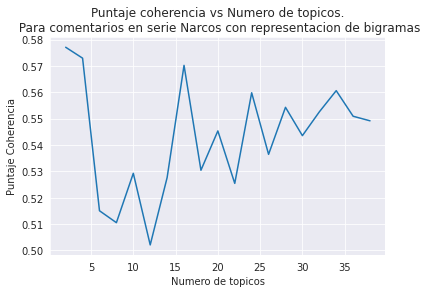

In [ ]:
# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.title("Puntaje coherencia vs Numero de topicos.\n Para {} en serie {} con representacion de bigramas".format(datos,tv))
plt.plot(x, coherence_values3)
plt.xlabel("Numero de topicos")
plt.ylabel("Puntaje Coherencia")
plt.savefig("/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/DOCUMENTS/YoutubeReport/"+carpeta+"/ModelToping/"+serie+"/NumeroTopicosRepresentacionBigramas"+carpeta+serie+".png",bbox_inches='tight')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values3):
    print("Numero de topicos =", m, " Con un valor de coherencia de", round(cv, 4))

Numero de topicos = 2  Con un valor de coherencia de 0.5771
Numero de topicos = 4  Con un valor de coherencia de 0.5729
Numero de topicos = 6  Con un valor de coherencia de 0.515
Numero de topicos = 8  Con un valor de coherencia de 0.5105
Numero de topicos = 10  Con un valor de coherencia de 0.5292
Numero de topicos = 12  Con un valor de coherencia de 0.5021
Numero de topicos = 14  Con un valor de coherencia de 0.5276
Numero de topicos = 16  Con un valor de coherencia de 0.5702
Numero de topicos = 18  Con un valor de coherencia de 0.5304
Numero de topicos = 20  Con un valor de coherencia de 0.5453
Numero de topicos = 22  Con un valor de coherencia de 0.5254
Numero de topicos = 24  Con un valor de coherencia de 0.5598
Numero de topicos = 26  Con un valor de coherencia de 0.5364
Numero de topicos = 28  Con un valor de coherencia de 0.5543
Numero de topicos = 30  Con un valor de coherencia de 0.5435
Numero de topicos = 32  Con un valor de coherencia de 0.5525
Numero de topicos = 34  Con u

In [ ]:
# Select the model and print the topics
optimal_model3 = model_list3[1]
model_topics3 = optimal_model3.show_topics(formatted=False)
print(optimal_model3.print_topics(num_words=10))

[(0, '0.007*"serie" + 0.005*"netflix" + 0.005*"video" + 0.004*"blackie" + 0.004*"wagner moura" + 0.004*"vikram" + 0.004*"played song" + 0.004*"ja" + 0.003*"nao" + 0.003*"bro"'), (1, '0.026*"serie" + 0.015*"pablo escobar" + 0.014*"si" + 0.012*"pablo" + 0.012*"mejor" + 0.010*"hacer" + 0.010*"patron mal" + 0.010*"decir" + 0.008*"ver" + 0.008*"escobar"'), (2, '0.022*"pablo" + 0.017*"like" + 0.009*"binod binod" + 0.007*"pablo escobar" + 0.007*"love" + 0.007*"song" + 0.007*"played" + 0.006*"binod" + 0.006*"one" + 0.005*"show"'), (3, '0.044*"texto" + 0.044*"no haber" + 0.015*"narcos" + 0.010*"pablo emilio" + 0.008*"song" + 0.008*"escobar gaviria" + 0.008*"patron" + 0.007*"good" + 0.007*"best" + 0.005*"man"')]


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model3, corpus_bigrams, id2word_bigrams)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.334291  0.020442       1        1  41.312104
2     -0.135506  0.245772       2        1  23.684886
0     -0.080737 -0.132829       3        1  20.483762
3     -0.118048 -0.133386       4        1  14.519247, topic_info=          Term         Freq        Total Category  logprob  loglift
76       texto  2592.000000  2592.000000  Default  30.0000  30.0000
75    no haber  2588.000000  2588.000000  Default  29.0000  29.0000
2        serie  4941.000000  4941.000000  Default  28.0000  28.0000
30       pablo  4254.000000  4254.000000  Default  27.0000  27.0000
1024      like  1619.000000  1619.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
28         man   276.006033   583.600621   Topic4  -5.3712   1.1809
2975    cartel   139.626700   325.722136   Topic4  -6.0526   1.0826
928      video   173.499940  1058.737279   Topic4  -5.8354   0.1210
239    netflix   151.152096  1023.974570   Topic4  -5.9733   0.0165
166    escobar   159.474290  1860.982803   Topic4  -5.9197  -0.5273

[184 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
4          1  0.901839         actor
4          4  0.097399         actor
707        3  0.992371            ai
3483       4  0.994820       amazing
3595       1  0.997642  andres parra
...      ...       ...           ...
824        4  0.994103         watch
11017      4  0.996249      watching
151        2  0.997090         would
828        2  0.998543           wow
3          1  0.998621            él

[167 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

### Construir el topic model OJO ==> Asignar numero de topicos

In [ ]:
NumTopics1=4
NumTopics2=4
NumTopics3=4
lda_model1 = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=NumTopics1,random_state=100,passes=20,alpha='auto',iterations=50)
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,id2word=id2word,num_topics=NumTopics2,random_state=100,passes=20,alpha='auto',iterations=50)
lda_model3 = gensim.models.ldamodel.LdaModel(corpus=corpus_bigrams,id2word=id2word_bigrams,num_topics=NumTopics3,random_state=100,passes=20,alpha='auto',iterations=50)

In [ ]:
lda_model1.save("/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/DOCUMENTS/YoutubeReport/"+carpeta+"/ModelToping/"+serie+"/Modelo"+carpeta+serie+"lda_model1(BolsaPalabras)")
lda_model2.save("/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/DOCUMENTS/YoutubeReport/"+carpeta+"/ModelToping/"+serie+"/Modelo"+carpeta+serie+"lda_model2(TF_IDF)")
lda_model3.save("/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/DOCUMENTS/YoutubeReport/"+carpeta+"/ModelToping/"+serie+"/Modelo"+carpeta+serie+"lda_model3(Bigramas)")

In [ ]:
#lda_model1 =  models.LdaModel.load('/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/DOCUMENTS/YoutubeReport/Comentarios/Modelo'+datos+serie+'lda_model1')

### Ver los topicos en el modelo LDA 

In [ ]:
for idx, topic in lda_model1.print_topics(num_topics=-1,num_words=12):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.025*"pablo" + 0.022*"serie" + 0.020*"escobar" + 0.014*"si" + 0.014*"patron" + 0.012*"mal" + 0.011*"hacer" + 0.011*"mejor" + 0.010*"ver" + 0.010*"decir" + 0.008*"popeye" + 0.007*"actor"
Topic: 1 
Words: 0.023*"haber" + 0.021*"texto" + 0.021*"no" + 0.018*"pablo" + 0.016*"song" + 0.014*"like" + 0.009*"played" + 0.009*"escobar" + 0.008*"narcos" + 0.007*"love" + 0.006*"best" + 0.006*"one"
Topic: 2 
Words: 0.023*"parra" + 0.023*"andres" + 0.018*"serie" + 0.013*"wagner" + 0.012*"moura" + 0.011*"pablo" + 0.010*"dea" + 0.007*"voz" + 0.007*"nao" + 0.006*"escobar" + 0.006*"chapo" + 0.006*"ja"
Topic: 3 
Words: 0.057*"binod" + 0.017*"badal" + 0.013*"vikram" + 0.005*"ke" + 0.004*"berna" + 0.003*"diabla" + 0.003*"moncada" + 0.003*"carlos" + 0.002*"il" + 0.002*"et" + 0.002*"hai" + 0.002*"velasco"


In [ ]:
for idx, topic in lda_model2.print_topics(num_topics=-1,num_words=12):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.019*"pablo" + 0.015*"escobar" + 0.012*"mejor" + 0.010*"mal" + 0.010*"si" + 0.009*"ver" + 0.007*"decir" + 0.007*"actor" + 0.007*"hacer" + 0.006*"plata" + 0.006*"serie" + 0.006*"buen"
Topic: 1 
Words: 0.043*"haber" + 0.043*"no" + 0.043*"texto" + 0.008*"best" + 0.004*"gusto" + 0.004*"blackie" + 0.004*"falto" + 0.004*"hes" + 0.003*"paisa" + 0.003*"bad" + 0.003*"ever" + 0.003*"cielos"
Topic: 2 
Words: 0.017*"serie" + 0.010*"narcos" + 0.008*"cartel" + 0.007*"netflix" + 0.006*"vikram" + 0.005*"todo" + 0.005*"malo" + 0.004*"temporada" + 0.004*"viva" + 0.004*"show" + 0.004*"wagner" + 0.004*"historia"
Topic: 3 
Words: 0.033*"patron" + 0.023*"popeye" + 0.010*"parra" + 0.010*"andres" + 0.009*"played" + 0.006*"gustavo" + 0.005*"encantar" + 0.005*"showed" + 0.005*"dios" + 0.004*"jajajaja" + 0.004*"muerto" + 0.004*"marino"


In [ ]:
for idx, topic in lda_model3.print_topics(num_topics=-1,num_words=12):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.006*"serie" + 0.004*"ja" + 0.004*"nao" + 0.003*"netflix" + 0.003*"bro" + 0.003*"wagner moura" + 0.003*"bandido" + 0.002*"narcos" + 0.002*"jodas" + 0.002*"diabla" + 0.002*"di" + 0.002*"melhor"
Topic: 1 
Words: 0.026*"serie" + 0.015*"pablo escobar" + 0.014*"si" + 0.012*"pablo" + 0.012*"mejor" + 0.010*"hacer" + 0.010*"patron mal" + 0.010*"decir" + 0.008*"ver" + 0.008*"escobar" + 0.007*"popeye" + 0.006*"narcos"
Topic: 2 
Words: 0.018*"pablo" + 0.014*"like" + 0.011*"song" + 0.008*"narcos" + 0.008*"binod binod" + 0.007*"pablo escobar" + 0.006*"love" + 0.006*"played" + 0.006*"man" + 0.005*"show" + 0.005*"one" + 0.005*"escobar"
Topic: 3 
Words: 0.055*"texto" + 0.055*"no haber" + 0.012*"pablo emilio" + 0.011*"binod" + 0.010*"escobar gaviria" + 0.008*"best" + 0.007*"video" + 0.005*"intro" + 0.005*"narcos mexico" + 0.005*"limon" + 0.004*"ever" + 0.004*"watch"


In [ ]:
Vocabulario1=len(id2word)
Vocabulario1

52379

In [ ]:
Vocabulario2=len(id2word_bigrams)
Vocabulario2

69266

In [ ]:
lda_model1.show_topics(num_topics=-1,num_words=Vocabulario1,formatted=False)

[(0,
  [('pablo', 0.025234807),
   ('serie', 0.021541964),
   ('escobar', 0.020271318),
   ('si', 0.014301779),
   ('patron', 0.013596785),
   ('mal', 0.011564887),
   ('hacer', 0.011185458),
   ('mejor', 0.010990057),
   ('ver', 0.0104294745),
   ('decir', 0.010297761),
   ('popeye', 0.007943121),
   ('actor', 0.0071419063),
   ('él', 0.0069892085),
   ('poder', 0.0066252165),
   ('colombiano', 0.0059949537),
   ('hablar', 0.005424065),
   ('buen', 0.005105789),
   ('narcos', 0.005026932),
   ('matar', 0.004957117),
   ('vida', 0.004611118),
   ('colombia', 0.0045542456),
   ('solo', 0.004503843),
   ('bien', 0.0044459556),
   ('cartel', 0.0042234976),
   ('acento', 0.004173188),
   ('saber', 0.00410977),
   ('ir', 0.003996209),
   ('plata', 0.0039701364),
   ('asi', 0.0038335726),
   ('querer', 0.00370148),
   ('dar', 0.003616184),
   ('tanto', 0.0035322388),
   ('narco', 0.003462393),
   ('video', 0.0034049673),
   ('historia', 0.0032583915),
   ('creer', 0.0032509728),
   ('real', 

In [ ]:
lda_model2.show_topics(num_topics=-1,num_words=Vocabulario1,formatted=False)

[(0,
  [('pablo', 0.019123625),
   ('escobar', 0.015298448),
   ('mejor', 0.01157636),
   ('mal', 0.010057149),
   ('si', 0.009911147),
   ('ver', 0.008920818),
   ('decir', 0.007357338),
   ('actor', 0.007159528),
   ('hacer', 0.0068539637),
   ('plata', 0.0063031414),
   ('serie', 0.006243982),
   ('buen', 0.0059718676),
   ('song', 0.0058887904),
   ('poder', 0.0055055064),
   ('plomo', 0.0052000666),
   ('hablar', 0.0050337934),
   ('colombiano', 0.004905432),
   ('capitulo', 0.0047941078),
   ('like', 0.004334127),
   ('acento', 0.0043208892),
   ('matar', 0.0043137185),
   ('él', 0.004291376),
   ('colombia', 0.00423372),
   ('real', 0.004103995),
   ('binod', 0.004101406),
   ('video', 0.003882296),
   ('bien', 0.003738226),
   ('vida', 0.0036928349),
   ('saber', 0.003617789),
   ('mierda', 0.0033705074),
   ('narco', 0.0033653658),
   ('love', 0.0033448825),
   ('solo', 0.0033202434),
   ('alguien', 0.0032735774),
   ('asi', 0.003264068),
   ('xd', 0.0032517528),
   ('tanto', 

In [ ]:
lda_model3.show_topics(num_topics=-1,num_words=Vocabulario2,formatted=False)

[(0,
  [('serie', 0.0061710984),
   ('ja', 0.003786211),
   ('nao', 0.0036924693),
   ('netflix', 0.0033594894),
   ('bro', 0.00303577),
   ('wagner moura', 0.0025974924),
   ('bandido', 0.002516522),
   ('narcos', 0.0024833176),
   ('jodas', 0.0022274486),
   ('diabla', 0.0019488367),
   ('di', 0.0019482287),
   ('melhor', 0.0018563562),
   ('ta', 0.0017951791),
   ('chimba', 0.0017928013),
   ('lindo', 0.0017669945),
   ('buenisimo', 0.001729123),
   ('video', 0.0016776185),
   ('che', 0.001643091),
   ('remix', 0.0016014865),
   ('jodas pablo', 0.0015063556),
   ('cara', 0.0014827321),
   ('bonito', 0.0014630923),
   ('vamos', 0.0013860606),
   ('brasileiro', 0.0013256491),
   ('brasil', 0.0013118762),
   ('ai', 0.0013117158),
   ('bom', 0.0011823149),
   ('pra', 0.0011707455),
   ('ama', 0.0011571002),
   ('adorar', 0.001108076),
   ('episodio', 0.001058306),
   ('series', 0.0010566721),
   ('il', 0.0010223003),
   ('pls', 0.0010081982),
   ('et', 0.0010036064),
   ('jesus', 0.0010

In [ ]:
len(lda_model1.show_topics(num_topics=-1,num_words=Vocabulario1,formatted=False))

4

In [ ]:
len(lda_model2.show_topics(num_topics=-1,num_words=Vocabulario1,formatted=False))

4

In [ ]:
len(lda_model3.show_topics(num_topics=-1,num_words=Vocabulario2,formatted=False))

4

In [ ]:
x,y=lda_model1.show_topics(num_topics=-1,num_words=Vocabulario1,formatted=False)[0]
len(y)

52379

In [ ]:
x,y=lda_model2.show_topics(num_topics=-1,num_words=Vocabulario1,formatted=False)[0]
len(y)

52379

In [ ]:
x,y=lda_model3.show_topics(num_topics=-1,num_words=Vocabulario2,formatted=False)[0]
len(y)

69266

In [ ]:
lda_model1.get_topics().shape

(4, 52379)

In [ ]:
lda_model2.get_topics().shape

(4, 52379)

In [ ]:
lda_model3.get_topics().shape

(4, 69266)

In [ ]:
lda_model1.get_topics()

array([[3.3761875e-04, 1.7923721e-03, 1.4953489e-06, ..., 6.7470285e-07,
        6.7470285e-07, 5.3735654e-05],
       [1.9099805e-06, 1.9034452e-06, 1.9014662e-06, ..., 1.8994710e-06,
        1.8994710e-06, 1.8991794e-06],
       [4.7011185e-06, 4.7177614e-06, 4.6741843e-06, ..., 4.6741843e-06,
        4.6741843e-06, 4.6741843e-06],
       [6.6944817e-06, 6.7258466e-06, 6.6880302e-06, ..., 5.3385587e-04,
        5.3385587e-04, 6.6880302e-06]], dtype=float32)

In [ ]:
lda_model2.get_topics()

array([[3.1690342e-06, 2.7227912e-03, 2.9276725e-06, ..., 5.2200146e-05,
        5.2200165e-05, 2.5701114e-05],
       [7.4843438e-06, 7.2519929e-06, 7.1247778e-06, ..., 1.4507567e-04,
        1.4507564e-04, 6.5201573e-05],
       [5.8489186e-06, 5.6161512e-06, 5.4850802e-06, ..., 1.1801624e-04,
        1.1801632e-04, 5.5107957e-05],
       [1.0216000e-03, 7.5292323e-06, 7.3803303e-06, ..., 1.2354027e-04,
        1.2354019e-04, 5.9088332e-05]], dtype=float32)

In [ ]:
lda_model3.get_topics()

array([[4.5523830e-06, 4.5523830e-06, 6.1710984e-03, ..., 4.5523848e-06,
        4.5523852e-06, 4.5523834e-06],
       [2.7940394e-05, 1.7829985e-06, 2.6077226e-02, ..., 8.1485683e-07,
        6.4032924e-05, 5.9884729e-05],
       [2.4454935e-06, 2.4454371e-06, 2.5646402e-06, ..., 2.4470564e-06,
        2.4475478e-06, 1.5093616e-05],
       [4.9023965e-06, 4.9023774e-06, 5.0020349e-06, ..., 3.9125225e-04,
        4.9032328e-06, 4.9026462e-06]], dtype=float32)

In [ ]:
caracteristicas1=[]
for k, v in id2word.iteritems():
  caracteristicas1.append(v)

In [ ]:
caracteristicas2=[]
for k, v in id2word_bigrams.iteritems():
  caracteristicas2.append(v)

In [ ]:
len(caracteristicas1)

52379

In [ ]:
len(caracteristicas2)

69266

In [ ]:
sorting1 = np.argsort(lda_model1.get_topics(), axis=1)[:, ::-1]
feature_names1 = np.array(caracteristicas1)

In [ ]:
sorting2 = np.argsort(lda_model2.get_topics(), axis=1)[:, ::-1]
feature_names2 = np.array(caracteristicas1)

In [ ]:
sorting3 = np.argsort(lda_model3.get_topics(), axis=1)[:, ::-1]
feature_names3 = np.array(caracteristicas2)

In [ ]:
sorting1

array([[   10,     3,     9, ..., 21172, 23229, 23036],
       [   89,    91,    90, ...,  2347,  2346,  5976],
       [ 3338,  3337,     3, ..., 36492, 36491, 52378],
       [22806, 22805, 15555, ..., 31872, 31870, 26189]])

In [ ]:
sorting2

array([[   10,     9,    41, ...,  6612, 23820, 23819],
       [   89,    90,    91, ..., 13260, 23819, 23820],
       [    3,   351,   129, ..., 13156, 23820, 23819],
       [   21,  1773,  3338, ..., 13237, 23820, 23819]])

In [ ]:
sorting3

array([[    2,   469,   426, ..., 20208, 20209,     0],
       [    2,     8,   307, ..., 23205, 30991, 30990],
       [   30,  1024,  3204, ..., 34406, 34404,  5975],
       [   76,    75,  1142, ...,  2681, 29530, 11175]])

In [ ]:
sorting1.shape

(4, 52379)

In [ ]:
sorting2.shape

(4, 52379)

In [ ]:
sorting3.shape

(4, 69266)

In [ ]:
documentos1=[]
for i in lda_model1.__getitem__(bow=corpus):
  documentos1.append(i)

In [ ]:
documentos2=[]
for i in lda_model2.__getitem__(bow=corpus_tfidf):
  documentos2.append(i)

In [ ]:
documentos3=[]
for i in lda_model3.__getitem__(bow=corpus_bigrams):
  documentos3.append(i)

In [ ]:
len(documentos1)

72493

In [ ]:
len(documentos2)

72493

In [ ]:
len(documentos3)

72493

In [ ]:
matrix1=[]
for i in range(NumTopics1):
  puntaje=[]
  for j in range(len(documentos1)):
    documentos1[j]
    for k in range(len(documentos1[j])):
      x,y=documentos1[j][k]
      if (x==i):
        puntaje.append(y)
        break
  matrix1.append(puntaje)

In [ ]:
matrix2=[]
for i in range(NumTopics2):
  puntaje=[]
  for j in range(len(documentos2)):
    documentos2[j]
    for k in range(len(documentos2[j])):
      x,y=documentos2[j][k]
      if (x==i):
        puntaje.append(y)
        break
  matrix2.append(puntaje)

In [ ]:
matrix3=[]
for i in range(NumTopics3):
  puntaje=[]
  for j in range(len(documentos3)):
    documentos3[j]
    for k in range(len(documentos3[j])):
      x,y=documentos3[j][k]
      if (x==i):
        puntaje.append(y)
        break
  matrix3.append(puntaje)

In [ ]:
len(matrix1)

4

In [ ]:
len(matrix2)

4

In [ ]:
len(matrix3)

4

In [ ]:
suma1=[]
for i in range(len(matrix1)):
  suma1.append(sum(matrix1[i]))

In [ ]:
suma2=[]
for i in range(len(matrix2)):
  suma2.append(sum(matrix2[i]))

In [ ]:
suma3=[]
for i in range(len(matrix3)):
  suma3.append(sum(matrix3[i]))

In [ ]:
len(suma1)

4

In [ ]:
len(suma2)

4

In [ ]:
len(suma3)

4

### Posibles titulos de topicos y palabras clave -> OJO (Organizar numero de graficas)

In [ ]:
serie='Narcos' # 'EscobarPatrondelMal', 'Dignity', 'Narcos', 'Los80,MasqueUnaModa', 'TresCaines'
carpeta='Comentarios' # 'Videos', 'Comentarios', 'RespuestasComentarios'
datos='comentarios' # 'respuestas en comentarios', 'comentarios', 'videos con ruido'
tv='Narcos' #'EPM', 'Narcos', 'Dignity', 'Los 80', 'Tres Caines'

#### Bolsa de palabras

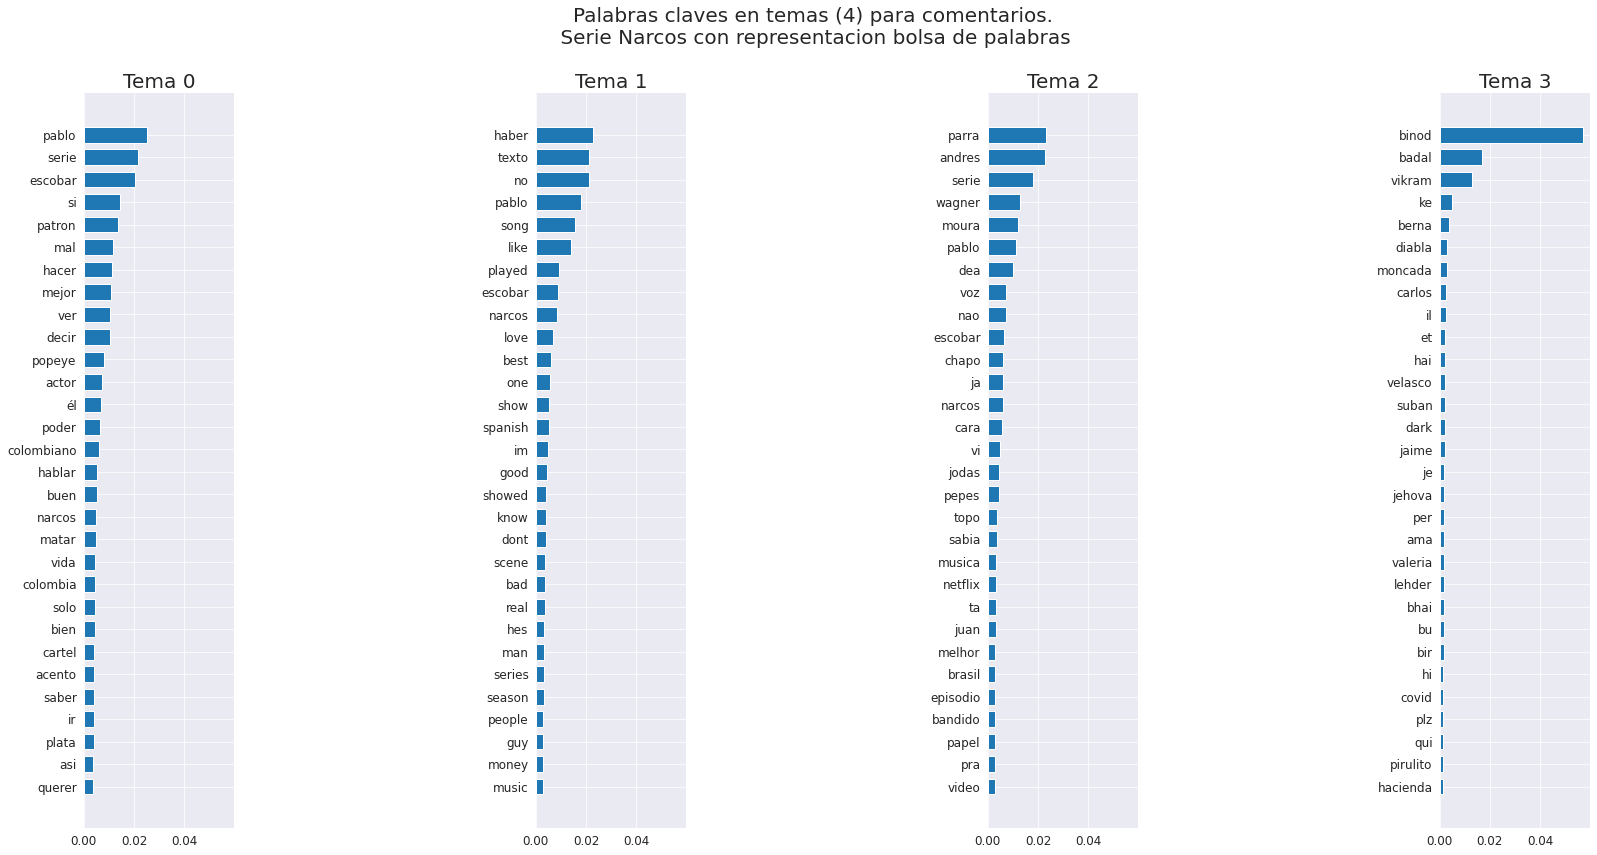

In [ ]:
def plot_top_words(lda_model, feature_names, n_top_words, title,w,v,representacion):
    fig, axes = plt.subplots(w, v, figsize=(27, 12), sharex=True) # ancho, largo
    axes = axes.flatten()
    for topic_idx, topic in enumerate(lda_model.get_topics()):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Tema {topic_idx}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=12)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20, y=1.0)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=2, hspace=0.3)
    plt.savefig("/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/DOCUMENTS/YoutubeReport/"+carpeta+"/ModelToping/"+serie+"/PalabrasClavesTemasCon"+representacion+carpeta+serie+".png",bbox_inches='tight')
    plt.show()
    
    
x=plot_top_words(lda_model1,feature_names1,30,'Palabras claves en temas ({}) para {}.\n Serie {} con representacion bolsa de palabras'.format(NumTopics1,datos,tv),1,4,'BolsaPalabras')

In [ ]:
topics = np.arange(0,NumTopics1)
mglearn.tools.print_topics(topics=topics, feature_names=feature_names1,sorting=sorting1, topics_per_chunk=int(NumTopics1/2), n_words=15)

topic 0       topic 1       
--------      --------      
pablo         haber         
serie         texto         
escobar       no            
si            pablo         
patron        song          
mal           like          
hacer         played        
mejor         escobar       
ver           narcos        
decir         love          
popeye        best          
actor         one           
él            show          
poder         spanish       
colombiano    im            


topic 2       topic 3       
--------      --------      
parra         binod         
andres        badal         
serie         vikram        
wagner        ke            
moura         berna         
pablo         diabla        
dea           moncada       
voz           carlos        
nao           il            
escobar       et            
chapo         hai           
ja            velasco       
narcos        suban         
cara          dark          
vi            jaime         




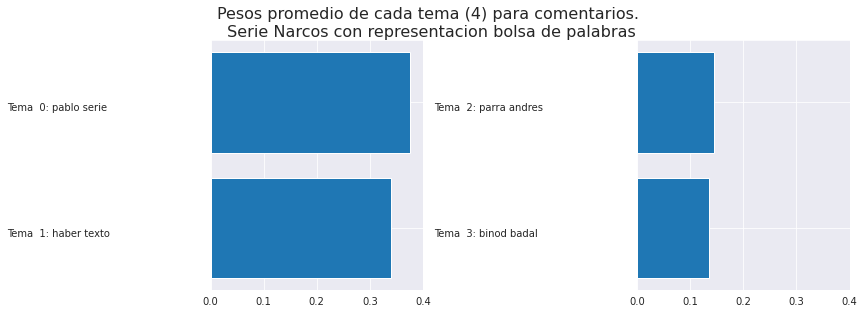

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12 , 4))
fig.suptitle('Pesos promedio de cada tema ({}) para {}.\n Serie {} con representacion bolsa de palabras'.format(NumTopics1,datos,tv), fontsize=16, y=1.08)

topic_names1 = ["Tema {:>2}: ".format(i) + " ".join(words) for i, words in enumerate(feature_names1[sorting1[:, :2]])]

# two column bar chart:
for col in [0, 1]:
  start = col * int(NumTopics1/2)
  end = (col + 1) * int(NumTopics1/2)
  ax[col].barh(np.arange(int(NumTopics1/2)), (np.array(suma1)/len(documentos1))[start:end])
  ax[col].set_yticks(np.arange(NumTopics1/2))
  ax[col].set_yticklabels(topic_names1[start:end], ha="left", va="top")
  ax[col].invert_yaxis()
  ax[col].set_xlim(0, 0.4)
  yax = ax[col].get_yaxis()
  yax.set_tick_params(pad=200)
plt.subplots_adjust(right=0.2)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/DOCUMENTS/YoutubeReport/"+carpeta+"/ModelToping/"+serie+"/ModeladodeTemasConBolsadePalabras"+carpeta+serie+".png",bbox_inches='tight')

In [ ]:
topic_names1

['Tema  0: pablo serie',
 'Tema  1: haber texto',
 'Tema  2: parra andres',
 'Tema  3: binod badal']

#### Tf-IDF

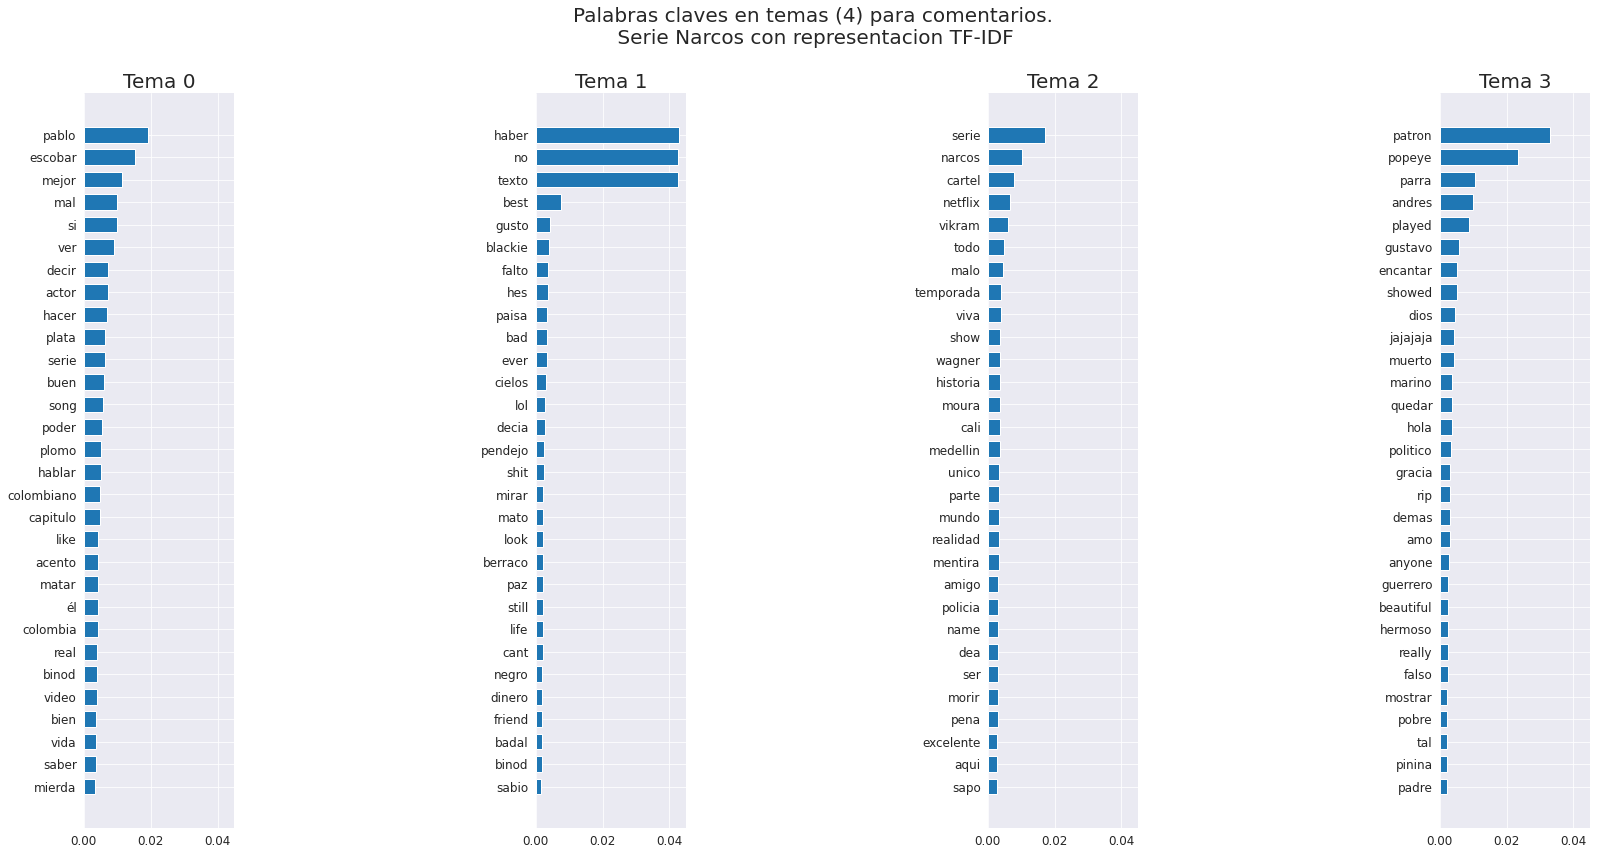

In [ ]:
plot_top_words(lda_model2,feature_names2,30,'Palabras claves en temas ({}) para {}.\n Serie {} con representacion TF-IDF'.format(NumTopics2,datos,tv),1,4,'TF-IDF')

In [ ]:
topics = np.arange(0,NumTopics2)
mglearn.tools.print_topics(topics=topics, feature_names=feature_names2,sorting=sorting2, topics_per_chunk=int(NumTopics2/2), n_words=15)

topic 0       topic 1       
--------      --------      
pablo         haber         
escobar       no            
mejor         texto         
mal           best          
si            gusto         
ver           blackie       
decir         falto         
actor         hes           
hacer         paisa         
plata         bad           
serie         ever          
buen          cielos        
song          lol           
poder         decia         
plomo         pendejo       


topic 2       topic 3       
--------      --------      
serie         patron        
narcos        popeye        
cartel        parra         
netflix       andres        
vikram        played        
todo          gustavo       
malo          encantar      
temporada     showed        
viva          dios          
show          jajajaja      
wagner        muerto        
historia      marino        
moura         quedar        
cali          hola          
medellin      politico      




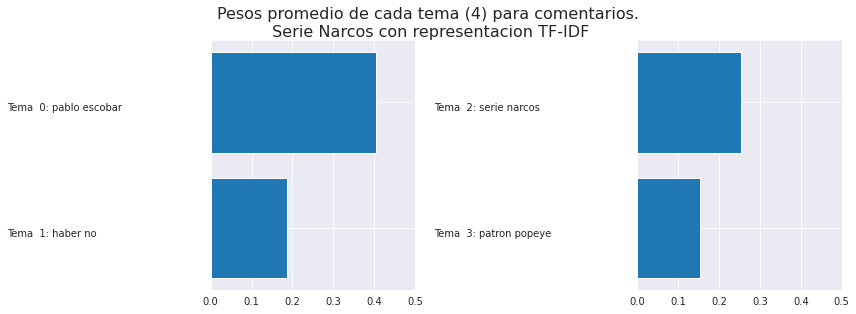

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12 , 4))
fig.suptitle('Pesos promedio de cada tema ({}) para {}.\n Serie {} con representacion TF-IDF'.format(NumTopics2,datos,tv), fontsize=16, y=1.08)

topic_names2 = ["Tema {:>2}: ".format(i) + " ".join(words) for i, words in enumerate(feature_names2[sorting2[:, :2]])]

# two column bar chart:
for col in [0, 1]:
  start = col * int(NumTopics2/2)
  end = (col + 1) * int(NumTopics2/2)
  ax[col].barh(np.arange(int(NumTopics2/2)), (np.array(suma2)/len(documentos2))[start:end])
  ax[col].set_yticks(np.arange(NumTopics2/2))
  ax[col].set_yticklabels(topic_names2[start:end], ha="left", va="top")
  ax[col].invert_yaxis()
  ax[col].set_xlim(0, 0.5)
  yax = ax[col].get_yaxis()
  yax.set_tick_params(pad=200)
plt.subplots_adjust(right=0.2)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/DOCUMENTS/YoutubeReport/"+carpeta+"/ModelToping/"+serie+"/ModeladodeTemasConTF-IDF"+carpeta+serie+".png",bbox_inches='tight')

In [ ]:
topic_names2

['Tema  0: pablo escobar',
 'Tema  1: haber no',
 'Tema  2: serie narcos',
 'Tema  3: patron popeye']

#### Bigramas

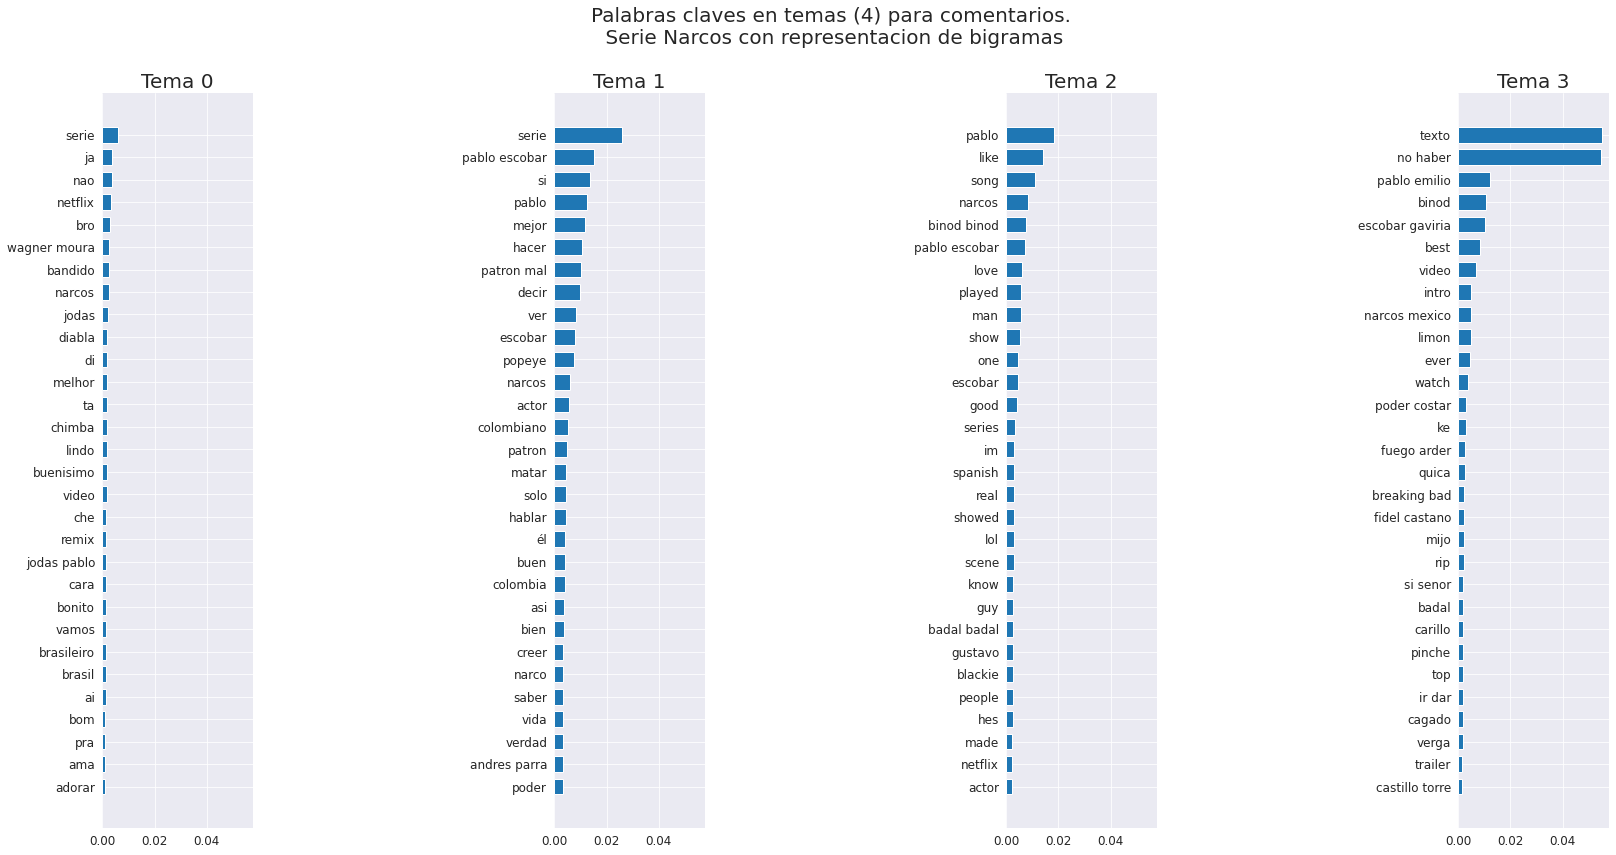

In [ ]:
plot_top_words(lda_model3,feature_names3,30,'Palabras claves en temas ({}) para {}.\n Serie {} con representacion de bigramas'.format(NumTopics3,datos,tv),1,4,'Bigramas')

In [ ]:
topics = np.arange(0,NumTopics3)
mglearn.tools.print_topics(topics=topics, feature_names=feature_names3,sorting=sorting3, topics_per_chunk=int(NumTopics3/2), n_words=15)

topic 0       topic 1       
--------      --------      
serie         serie         
ja            pablo escobar 
nao           si            
netflix       pablo         
bro           mejor         
wagner moura  hacer         
bandido       patron mal    
narcos        decir         
jodas         ver           
diabla        escobar       
di            popeye        
melhor        narcos        
ta            actor         
chimba        colombiano    
lindo         patron        


topic 2       topic 3       
--------      --------      
pablo         texto         
like          no haber      
song          pablo emilio  
narcos        binod         
binod binod   escobar gaviria
pablo escobar best          
love          video         
played        intro         
man           narcos mexico 
show          limon         
one           ever          
escobar       watch         
good          poder costar  
series        ke            
im            fuego arder   




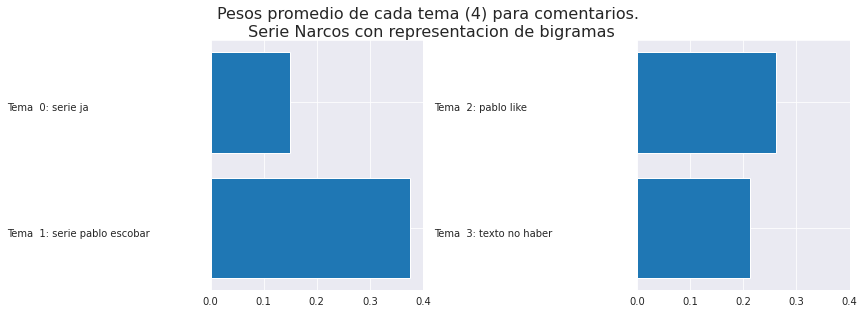

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12 , 4))
fig.suptitle('Pesos promedio de cada tema ({}) para {}.\n Serie {} con representacion de bigramas'.format(NumTopics3,datos,tv), fontsize=16, y=1.08)

topic_names3 = ["Tema {:>2}: ".format(i) + " ".join(words) for i, words in enumerate(feature_names3[sorting3[:, :2]])]

# two column bar chart:
for col in [0, 1]:
  start = col * int(NumTopics3/2)
  end = (col + 1) * int(NumTopics3/2)
  ax[col].barh(np.arange(int(NumTopics3/2)), (np.array(suma3)/len(documentos3))[start:end])
  ax[col].set_yticks(np.arange(NumTopics3/2))
  ax[col].set_yticklabels(topic_names3[start:end], ha="left", va="top")
  ax[col].invert_yaxis()
  ax[col].set_xlim(0, 0.4)
  yax = ax[col].get_yaxis()
  yax.set_tick_params(pad=200)
plt.subplots_adjust(right=0.2)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/DOCUMENTS/YoutubeReport/"+carpeta+"/ModelToping/"+serie+"/ModeladodeTemasConBigramas"+carpeta+serie+".png",bbox_inches='tight')

In [ ]:
topic_names3

['Tema  0: serie ja',
 'Tema  1: serie pablo escobar',
 'Tema  2: pablo like',
 'Tema  3: texto no haber']

###Perplejidad del modelo y coherencia

In [ ]:
# Compute Perplexity
print('\nPerplexity en representacion bolsa de palabras: ', lda_model1.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model1, texts=Tokenizado, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score en representacion bolsa de palabras: ', coherence_lda)


Perplexity en representacion bolsa de palabras:  -8.351752882774102

Coherence Score en representacion bolsa de palabras:  0.5730392904100674


In [ ]:
# Compute Perplexity
print('\nPerplexity en representacion TF-IDF: ', lda_model2.log_perplexity(corpus_tfidf))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model2, texts=Tokenizado, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score en representacion TF-IDF: ', coherence_lda)


Perplexity en representacion TF-IDF:  -9.935185616438524

Coherence Score en representacion TF-IDF:  0.5016668405368924


In [ ]:
# Compute Perplexity
print('\nPerplexity en representacion Bigramas: ', lda_model3.log_perplexity(corpus_bigrams))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model3, texts=data_words_bigrams, dictionary=id2word_bigrams, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score en representacion Bigramas: ', coherence_lda)


Perplexity en representacion Bigramas:  -9.504362354908588

Coherence Score en representacion Bigramas:  0.5873881869213882


###Visualizando topicos

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model1, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.323067 -0.078773       1        1  42.521741
1      0.194428 -0.261463       2        1  28.999043
2     -0.005695  0.145100       3        1  15.999400
3      0.134334  0.195135       4        1  12.479817, topic_info=         Term         Freq        Total Category  logprob  loglift
22806   binod  3587.000000  3587.000000  Default  30.0000  30.0000
89      haber  3352.000000  3352.000000  Default  29.0000  29.0000
91      texto  3103.000000  3103.000000  Default  28.0000  28.0000
90         no  3099.000000  3099.000000  Default  27.0000  27.0000
3       serie  6060.000000  6060.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
5087    jaime   122.668637   126.773758   Topic4  -6.2392   2.0481
6122    duque    78.585297    79.552896   Topic4  -6.6845   2.0688
521       per   115.375684   125.839192   Topic4  -6.3005   1.9942
9068      ama   112.864367   133.814971   Topic4  -6.3225   1.9108
3756   carlos   158.882337   255.860088   Topic4  -5.9805   1.6046

[186 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1524      1  0.998998    acento
5         1  0.819407     actor
5         2  0.180484     actor
402       1  0.998127   alguien
9068      3  0.149460       ama
...     ...       ...       ...
731       3  0.993113      voce
25        3  0.997876       voz
391       3  0.999104    wagner
8373      2  0.998296  watching
4         1  0.999303        él

[187 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model2, corpus_tfidf, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.284192 -0.005308       1        1  40.540334
2      0.088014  0.200822       2        1  25.528529
1      0.096630 -0.095747       3        1  18.623497
3      0.099548 -0.099766       4        1  15.307639, topic_info=           Term         Freq        Total Category  logprob  loglift
89        haber  1240.000000  1240.000000  Default  30.0000  30.0000
90           no  1234.000000  1234.000000  Default  29.0000  29.0000
91        texto  1233.000000  1233.000000  Default  28.0000  28.0000
21       patron   783.000000   783.000000  Default  27.0000  27.0000
10        pablo  1204.000000  1204.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
132       padre    53.613321    54.319795   Topic4  -6.0941   1.8637
88        super    46.423557    47.037613   Topic4  -6.2381   1.8637
8243        gay    47.918609    48.554625   Topic4  -6.2064   1.8636
8427     pinina    54.453566    55.472223   Topic4  -6.0786   1.8583
10611  guerrero    62.718803    64.636066   Topic4  -5.9372   1.8467

[167 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1524      1  0.997954    acento
5         1  0.999557     actor
402       1  0.996816   alguien
1044      2  0.995861     amigo
715       4  0.991922       amo
...     ...       ...       ...
25        2  0.998267       voz
391       2  0.995928    wagner
8373      2  0.997335  watching
726       1  0.998713        xd
4         1  0.997455        él

[145 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model3, corpus_bigrams, id2word_bigrams)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.334118  0.006508       1        1  44.059832
2      0.104920 -0.266513       2        1  26.514096
0      0.094671  0.121456       3        1  17.330534
3      0.134527  0.138549       4        1  12.095538, topic_info=                Term         Freq        Total Category  logprob  loglift
76             texto  2713.000000  2713.000000  Default  30.0000  30.0000
75          no haber  2709.000000  2709.000000  Default  29.0000  29.0000
2              serie  5136.000000  5136.000000  Default  28.0000  28.0000
307               si  2499.000000  2499.000000  Default  27.0000  27.0000
1024            like  1521.000000  1521.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
5772  garganta ansio    74.737209    75.469830   Topic4  -6.4950   2.1026
456          trailer    81.786324    82.611220   Topic4  -6.4048   2.1023
1828         carillo    91.964305    93.013198   Topic4  -6.2875   2.1010
928            video   331.875124   993.086246   Topic4  -5.0042   1.0163
597              top    88.300104   131.195584   Topic4  -6.3282   1.7164

[179 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
4          1  0.797972         actor
4          2  0.201095         actor
495        3  0.996805        adorar
707        3  0.993426            ai
23073      3  0.990992           ama
...      ...       ...           ...
441        2  0.322294  wagner moura
441        3  0.417620  wagner moura
824        4  0.994992         watch
151        2  0.996962         would
3          1  0.998868            él

[164 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

### Encontrar el tema dominante en cada documento

#### Funciones

In [ ]:
def format_topics_sentences_bolsapalabras(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['TemaDominante(BolsaPalabras)', 'ContribucionPorcentaje(BolsaPalabras)', 'PalabrasClave(BolsaPalabras)']

    # Add original text to the end of the output
    contents = texts
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

def format_topics_sentences_tf_idf(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['TemaDominante(tf_idf)', 'ContribucionPorcentaje(tf_idf)', 'PalabrasClave(tf_idf)']

    # Add original text to the end of the output
    contents = texts
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


def format_topics_sentences_bigramas(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['TemaDominante(Bigramas)', 'ContribucionPorcentaje(Bigramas)', 'PalabrasClave(Bigramas)']

    # Add original text to the end of the output
    contents = texts
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords1 = format_topics_sentences_bolsapalabras(ldamodel=lda_model1, corpus=corpus, texts=dfVD)
df_topic_sents_keywords2 = format_topics_sentences_tf_idf(ldamodel=lda_model2, corpus=corpus_tfidf, texts=df_topic_sents_keywords1)
df_topic_sents_keywords3 = format_topics_sentences_bigramas(ldamodel=lda_model3, corpus=corpus_bigrams, texts=df_topic_sents_keywords2)

In [ ]:
pd.unique(df_topic_sents_keywords3['TemaDominante(BolsaPalabras)'])

array([0., 3., 2., 1.])

In [ ]:
NewnumTopics1=len(pd.unique(df_topic_sents_keywords3['TemaDominante(BolsaPalabras)']))
NewnumTopics1

4

In [ ]:
pd.unique(df_topic_sents_keywords3['TemaDominante(tf_idf)'])

array([0.])

In [ ]:
NewnumTopics2=len(pd.unique(df_topic_sents_keywords3['TemaDominante(tf_idf)']))
NewnumTopics2

1

In [ ]:
pd.unique(df_topic_sents_keywords3['TemaDominante(Bigramas)'])

array([1., 3., 0., 2.])

In [ ]:
NewnumTopics3=len(pd.unique(df_topic_sents_keywords3['TemaDominante(Bigramas)']))
NewnumTopics3

4

In [ ]:
# Show
df_topic_sents_keywords3.head(10)

,TemaDominante(Bigramas),ContribucionPorcentaje(Bigramas),PalabrasClave(Bigramas),TemaDominante(tf_idf),ContribucionPorcentaje(tf_idf),PalabrasClave(tf_idf),TemaDominante(BolsaPalabras),ContribucionPorcentaje(BolsaPalabras),PalabrasClave(BolsaPalabras),idVideo,...,ReplicarComentarioPrincipal,NombreAutorComentarioPrincipal,PaisComentarioPrincipal,URLAutorCanalComentarioPrincipal,idAutorCanalComentarioPrincipal,CalificacionEspectadorComentarioPrincipal,CalificarComentarioPrincipal,SolicitudComentarioPrincipal,ComentarioPrincipalModificadoLematizadoProfundo,Tokenizado
0,1.0,0.9459,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4058,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.9654,"pablo, serie, escobar, si, patron, mal, hacer,...",NS8JbFvuTb4,...,True,antonio rojas,NaN,http://www.youtube.com/channel/UCe4dp_6RRUVBjt...,UCe4dp_6RRUVBjtMtgryAXWw,none,True,1,serie deberia llamar él parasito,"[serie, deberia, llamar, él, parasito]"
1,1.0,0.9746,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4233,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.9821,"pablo, serie, escobar, si, patron, mal, hacer,...",NS8JbFvuTb4,...,True,Rayito 2005,NaN,http://www.youtube.com/channel/UCvDIFLtv3o7Nw6...,UCvDIFLtv3o7Nw6YMHeLbVLA,none,True,1,actor encarnar pablo escobar practicamente ros...,"[actor, encarnar, pablo, escobar, practicament..."
2,3.0,0.7564,"texto, no haber, pablo emilio, binod, escobar ...",0.0,0.4032,"pablo, escobar, mejor, mal, si, ver, decir, ac...",3.0,0.7776,"binod, badal, vikram, ke, berna, diabla, monca...",NS8JbFvuTb4,...,True,el vagabundo,NaN,http://www.youtube.com/channel/UCPNgBfrHPI81gl...,UCPNgBfrHPI81glx-lA68xMA,none,True,1,saludoz,[saludoz]
3,3.0,0.7564,"texto, no haber, pablo emilio, binod, escobar ...",0.0,0.4032,"pablo, escobar, mejor, mal, si, ver, decir, ac...",3.0,0.7776,"binod, badal, vikram, ke, berna, diabla, monca...",NS8JbFvuTb4,...,True,el vagabundo,NaN,http://www.youtube.com/channel/UCPNgBfrHPI81gl...,UCPNgBfrHPI81glx-lA68xMA,none,True,1,saludoz,[saludoz]
4,1.0,0.8325,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4117,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.8617,"pablo, serie, escobar, si, patron, mal, hacer,...",NS8JbFvuTb4,...,True,el vagabundo,NaN,http://www.youtube.com/channel/UCPNgBfrHPI81gl...,UCPNgBfrHPI81glx-lA68xMA,none,True,1,saludo,[saludo]
5,1.0,0.8325,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4117,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.8617,"pablo, serie, escobar, si, patron, mal, hacer,...",NS8JbFvuTb4,...,True,el vagabundo,NaN,http://www.youtube.com/channel/UCPNgBfrHPI81gl...,UCPNgBfrHPI81glx-lA68xMA,none,True,1,saludo,[saludo]
6,1.0,0.9716,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4048,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.7862,"pablo, serie, escobar, si, patron, mal, hacer,...",NS8JbFvuTb4,...,True,alexander Quintero,NaN,http://www.youtube.com/channel/UCo8D6jaNVpwv4p...,UCo8D6jaNVpwv4pjia4PxqbQ,none,True,1,ver produccion colombiano patron mal fotografi...,"[ver, produccion, colombiano, patron, mal, fot..."
7,1.0,0.8184,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4058,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.9871,"pablo, serie, escobar, si, patron, mal, hacer,...",NS8JbFvuTb4,...,True,Keyla,CO,http://www.youtube.com/channel/UCoDzRUB5tI4R9W...,UCoDzRUB5tI4R9WtqebYyT-Q,none,True,1,pablo corrompio politicos man conocer colombia...,"[pablo, corrompio, politicos, man, conocer, co..."
8,1.0,0.6734,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4042,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.9778,"pablo, serie, escobar, si, patron, mal, hacer,...",NS8JbFvuTb4,...,True,Iván Borda,NaN,http://www.youtube.com/channel/UC9XJNVLCPyfA86...,UC9XJNVLCPyfA86aa92N-cfA,none,True,1,aaggg cancer actor mejor espanol adres verga a...,"[aaggg, cancer, actor, mejor, espanol, adres, ..."
9,0.0,0.8154,"serie, ja, nao, netflix,

#### Exportando modelos de temas

In [ ]:
serie='Narcos'

In [ ]:
ruta='/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/SEARCHES/YoutubeResults/Series/\
'+serie+'/'+carpeta

#ruta='/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/SEARCHES/YoutubeResults/Series/\
#'+serie

In [ ]:
nombre='ComentariosTemas' # 'VideosRuidoconTemas' , 'ComentariosTemas', 'RespuestasTemas'
df_topic_sents_keywords3.to_csv(ruta+'/'+nombre+'.csv', index=False)

In [ ]:
df_topic_sents_keywords3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72493 entries, 0 to 72492
Data columns (total 32 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   TemaDominante(Bigramas)                          72493 non-null  float64
 1   ContribucionPorcentaje(Bigramas)                 72493 non-null  float32
 2   PalabrasClave(Bigramas)                          72493 non-null  object 
 3   TemaDominante(tf_idf)                            72493 non-null  float64
 4   ContribucionPorcentaje(tf_idf)                   72493 non-null  float32
 5   PalabrasClave(tf_idf)                            72493 non-null  object 
 6   TemaDominante(BolsaPalabras)                     72493 non-null  float64
 7   ContribucionPorcentaje(BolsaPalabras)            72493 non-null  float32
 8   PalabrasClave(BolsaPalabras)                     72493 non-null  object 
 9   idVideo                     

In [ ]:
df_topic_sents_keywords3[df_topic_sents_keywords3['TemaDominante(BolsaPalabras)']==0.0]

,TemaDominante(Bigramas),ContribucionPorcentaje(Bigramas),PalabrasClave(Bigramas),TemaDominante(tf_idf),ContribucionPorcentaje(tf_idf),PalabrasClave(tf_idf),TemaDominante(BolsaPalabras),ContribucionPorcentaje(BolsaPalabras),PalabrasClave(BolsaPalabras),idVideo,...,ReplicarComentarioPrincipal,NombreAutorComentarioPrincipal,PaisComentarioPrincipal,URLAutorCanalComentarioPrincipal,idAutorCanalComentarioPrincipal,CalificacionEspectadorComentarioPrincipal,CalificarComentarioPrincipal,SolicitudComentarioPrincipal,ComentarioPrincipalModificadoLematizadoProfundo,Tokenizado
0,1.0,0.9459,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4058,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.9654,"pablo, serie, escobar, si, patron, mal, hacer,...",NS8JbFvuTb4,...,True,antonio rojas,NaN,http://www.youtube.com/channel/UCe4dp_6RRUVBjt...,UCe4dp_6RRUVBjtMtgryAXWw,none,True,1,serie deberia llamar él parasito,"[serie, deberia, llamar, él, parasito]"
1,1.0,0.9746,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4233,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.9821,"pablo, serie, escobar, si, patron, mal, hacer,...",NS8JbFvuTb4,...,True,Rayito 2005,NaN,http://www.youtube.com/channel/UCvDIFLtv3o7Nw6...,UCvDIFLtv3o7Nw6YMHeLbVLA,none,True,1,actor encarnar pablo escobar practicamente ros...,"[actor, encarnar, pablo, escobar, practicament..."
4,1.0,0.8325,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4117,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.8617,"pablo, serie, escobar, si, patron, mal, hacer,...",NS8JbFvuTb4,...,True,el vagabundo,NaN,http://www.youtube.com/channel/UCPNgBfrHPI81gl...,UCPNgBfrHPI81glx-lA68xMA,none,True,1,saludo,[saludo]
5,1.0,0.8325,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4117,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.8617,"pablo, serie, escobar, si, patron, mal, hacer,...",NS8JbFvuTb4,...,True,el vagabundo,NaN,http://www.youtube.com/channel/UCPNgBfrHPI81gl...,UCPNgBfrHPI81glx-lA68xMA,none,True,1,saludo,[saludo]
6,1.0,0.9716,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4048,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.7862,"pablo, serie, escobar, si, patron, mal, hacer,...",NS8JbFvuTb4,...,True,alexander Quintero,NaN,http://www.youtube.com/channel/UCo8D6jaNVpwv4p...,UCo8D6jaNVpwv4pjia4PxqbQ,none,True,1,ver produccion colombiano patron mal fotografi...,"[ver, produccion, colombiano, patron, mal, fot..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72487,2.0,0.4530,"pablo, like, song, narcos, binod binod, pablo ...",0.0,0.4008,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.4868,"pablo, serie, escobar, si, patron, mal, hacer,...",Kw7NTEw1ilo,...,True,Andrea Vega M,PE,http://www.youtube.com/channel/UCxFRfULNRtq99y...,UCxFRfULNRtq99yGDrnx6TbA,none,True,1208,blackie tayson,"[blackie, tayson]"
72489,1.0,0.9301,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4144,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.9654,"pablo, serie, escobar, si, patron, mal, hacer,...",Kw7NTEw1ilo,...,True,Zaid Gil,NaN,http://www.youtube.com/channel/UCwUfx2yjU786gr...,UCwUfx2yjU786gr0e313RaRQ,none,True,1208,aparecer alias mugre dar cuenta,"[aparecer, alias, mugre, dar, cuenta]"
72490,1.0,0.4945,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4055,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.4961,"pablo, serie, escobar, si, patron, mal, hacer,...",Kw7NTEw1ilo,...,True,Lucas,NaN,http://www.youtube.com/channel/UCuSRvgpSEW6mRI...,UCuSRvgpSEW6mRI9_FwzUCFg,none,True,1208,mejor blackie junto poison,"[mejor, blackie, junto, poison]"
72491,1.0,0.9627,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4121,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.9748,"pablo, serie, escobar, si, patron, mal, hacer,...",Kw7NTEw1ilo,...,True,jesusdd 133,NaN,http://www.youtube.com/channel/UCjU_RsNeAxiFKP...,UCjU_RsNeAxiFKPosp1hIitw,none,True,1

In [ ]:
len(df_topic_sents_keywords3[df_topic_sents_keywords3['TemaDominante(BolsaPalabras)']==0.0])

26989

#### Bolsa de palabras

##### Documento mas representativo para cada tema

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords3.groupby('TemaDominante(BolsaPalabras)')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['ContribucionPorcentaje(BolsaPalabras)'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)


# Show
sent_topics_sorteddf_mallet

,TemaDominante(Bigramas),ContribucionPorcentaje(Bigramas),PalabrasClave(Bigramas),TemaDominante(tf_idf),ContribucionPorcentaje(tf_idf),PalabrasClave(tf_idf),TemaDominante(BolsaPalabras),ContribucionPorcentaje(BolsaPalabras),PalabrasClave(BolsaPalabras),idVideo,...,ReplicarComentarioPrincipal,NombreAutorComentarioPrincipal,PaisComentarioPrincipal,URLAutorCanalComentarioPrincipal,idAutorCanalComentarioPrincipal,CalificacionEspectadorComentarioPrincipal,CalificarComentarioPrincipal,SolicitudComentarioPrincipal,ComentarioPrincipalModificadoLematizadoProfundo,Tokenizado
0,0.0,0.8132,"serie, ja, nao, netflix, bro, wagner moura, ba...",0.0,0.4343,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.9996,"pablo, serie, escobar, si, patron, mal, hacer,...",aj0T7em123c,...,True,Juan De Dios,NaN,http://www.youtube.com/channel/UC1SZI1tnymuBcP...,UC1SZI1tnymuBcP2ZoEzwd_w,none,True,1205,hermoso pais horrible tumor maligno ramificaci...,"[hermoso, pais, horrible, tumor, maligno, rami..."
1,2.0,0.9958,"pablo, like, song, narcos, binod binod, pablo ...",0.0,0.4081,"pablo, escobar, mejor, mal, si, ver, decir, ac...",1.0,0.9984,"haber, texto, no, pablo, song, like, played, e...",U3oLCYVlXwI,...,True,x3omarx3,NaN,http://www.youtube.com/channel/UCFz2s5AU4BjTDk...,UCFz2s5AU4BjTDkMaOtUhpTQ,none,True,579,song sing friends another one pain see crying ...,"[song, sing, friends, another, one, pain, see,..."
2,1.0,0.8210,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4009,"pablo, escobar, mejor, mal, si, ver, decir, ac...",2.0,0.9987,"parra, andres, serie, wagner, moura, pablo, de...",7Rfud43WJSk,...,True,Augusto chaves,NaN,http://www.youtube.com/channel/UCHAsc2a98qkE6H...,UCHAsc2a98qkE6H6CiCk-Huw,none,True,508,incomodar muita gente incomodar incomodar muit...,"[incomodar, muita, gente, incomodar, incomodar..."
3,2.0,0.9996,"pablo, like, song, narcos, binod binod, pablo ...",0.0,0.4099,"pablo, escobar, mejor, mal, si, ver, decir, ac...",3.0,0.9998,"binod, badal, vikram, ke, berna, diabla, monca...",jMP1_gm1vXk,...,True,Mukesh Kumar Rathi,NaN,http://www.youtube.com/channel/UC8iZYD5VvTUsMw...,UC8iZYD5VvTUsMwH7rQucAGA,none,True,423,binod binod binod binod binod binod binod bino...,"[binod, binod, binod, binod, binod, binod, bin..."


##### Distribución de temas en los documentos 

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords3['TemaDominante(BolsaPalabras)'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_mallet[['TemaDominante(BolsaPalabras)', 'PalabrasClave(BolsaPalabras)']]


In [ ]:
x=pd.DataFrame(topic_counts).reset_index()
x.columns = ['TemaDominante(BolsaPalabras)', 'ConteoDocumentos(BolsaPalabras)']
x

,TemaDominante(BolsaPalabras),ConteoDocumentos(BolsaPalabras)
0,0.0,26989
1,1.0,25245
2,3.0,10388
3,2.0,9871


In [ ]:
y=pd.DataFrame(topic_contribution).reset_index()
y.columns = ['TemaDominante(BolsaPalabras)', 'PorcentajeDocumentos(BolsaPalabras)']
y

,TemaDominante(BolsaPalabras),PorcentajeDocumentos(BolsaPalabras)
0,0.0,0.3723
1,1.0,0.3482
2,3.0,0.1433
3,2.0,0.1362


In [ ]:
w=pd.merge(x,y,left_on='TemaDominante(BolsaPalabras)',right_on='TemaDominante(BolsaPalabras)')
w

,TemaDominante(BolsaPalabras),ConteoDocumentos(BolsaPalabras),PorcentajeDocumentos(BolsaPalabras)
0,0.0,26989,0.3723
1,1.0,25245,0.3482
2,3.0,10388,0.1433
3,2.0,9871,0.1362


In [ ]:
z=topic_num_keywords
z

,TemaDominante(BolsaPalabras),PalabrasClave(BolsaPalabras)
0,0.0,"pablo, serie, escobar, si, patron, mal, hacer,..."
1,1.0,"haber, texto, no, pablo, song, like, played, e..."
2,2.0,"parra, andres, serie, wagner, moura, pablo, de..."
3,3.0,"binod, badal, vikram, ke, berna, diabla, monca..."


In [ ]:
df_dominant_topics=pd.merge(w,z,left_on='TemaDominante(BolsaPalabras)',right_on='TemaDominante(BolsaPalabras)')
df_dominant_topics

,TemaDominante(BolsaPalabras),ConteoDocumentos(BolsaPalabras),PorcentajeDocumentos(BolsaPalabras),PalabrasClave(BolsaPalabras)
0,0.0,26989,0.3723,"pablo, serie, escobar, si, patron, mal, hacer,..."
1,1.0,25245,0.3482,"haber, texto, no, pablo, song, like, played, e..."
2,3.0,10388,0.1433,"binod, badal, vikram, ke, berna, diabla, monca..."
3,2.0,9871,0.1362,"parra, andres, serie, wagner, moura, pablo, de..."


In [ ]:
bolsa=df_dominant_topics[['TemaDominante(BolsaPalabras)','ConteoDocumentos(BolsaPalabras)']].sort_values(by='ConteoDocumentos(BolsaPalabras)',ascending=False, ignore_index=True)
bolsa

,TemaDominante(BolsaPalabras),ConteoDocumentos(BolsaPalabras)
0,0.0,26989
1,1.0,25245
2,3.0,10388
3,2.0,9871


In [ ]:
bolsa['TemaDominante(BolsaPalabras)']=bolsa['TemaDominante(BolsaPalabras)'].astype('int')
bolsa

,TemaDominante(BolsaPalabras),ConteoDocumentos(BolsaPalabras)
0,0,26989
1,1,25245
2,3,10388
3,2,9871


In [ ]:
topic_names1

['Tema  0: pablo serie',
 'Tema  1: haber texto',
 'Tema  2: parra andres',
 'Tema  3: binod badal']

In [ ]:
dic_topic_names1={}
for i in range(len(topic_names1)):
  dic_topic_names1[i]=topic_names1[i]
dic_topic_names1

{0: 'Tema  0: pablo serie',
 1: 'Tema  1: haber texto',
 2: 'Tema  2: parra andres',
 3: 'Tema  3: binod badal'}

In [ ]:
list(dic_topic_names1.keys())

[0, 1, 2, 3]

In [ ]:
list(dic_topic_names1.values())

['Tema  0: pablo serie',
 'Tema  1: haber texto',
 'Tema  2: parra andres',
 'Tema  3: binod badal']

In [ ]:
diccionario_Final1={'TemaDominante(BolsaPalabras)':list(dic_topic_names1.keys()),'Nombre Tema':list(dic_topic_names1.values())}
diccionario_Final1

{'TemaDominante(BolsaPalabras)': [0, 1, 2, 3],
 'Nombre Tema': ['Tema  0: pablo serie',
  'Tema  1: haber texto',
  'Tema  2: parra andres',
  'Tema  3: binod badal']}

In [ ]:
temas1=pd.DataFrame(diccionario_Final1)
temas1

,TemaDominante(BolsaPalabras),Nombre Tema
0,0,Tema 0: pablo serie
1,1,Tema 1: haber texto
2,2,Tema 2: parra andres
3,3,Tema 3: binod badal


In [ ]:
bolsa=pd.merge(bolsa,temas1,left_on='TemaDominante(BolsaPalabras)',right_on='TemaDominante(BolsaPalabras)')
bolsa

,TemaDominante(BolsaPalabras),ConteoDocumentos(BolsaPalabras),Nombre Tema
0,0,26989,Tema 0: pablo serie
1,1,25245,Tema 1: haber texto
2,3,10388,Tema 3: binod badal
3,2,9871,Tema 2: parra andres


In [ ]:
bolsa.columns = ['Tema Dominante','Videos','Tema']

In [ ]:
bolsa

,Tema Dominante,Videos,Tema
0,0,26989,Tema 0: pablo serie
1,1,25245,Tema 1: haber texto
2,3,10388,Tema 3: binod badal
3,2,9871,Tema 2: parra andres


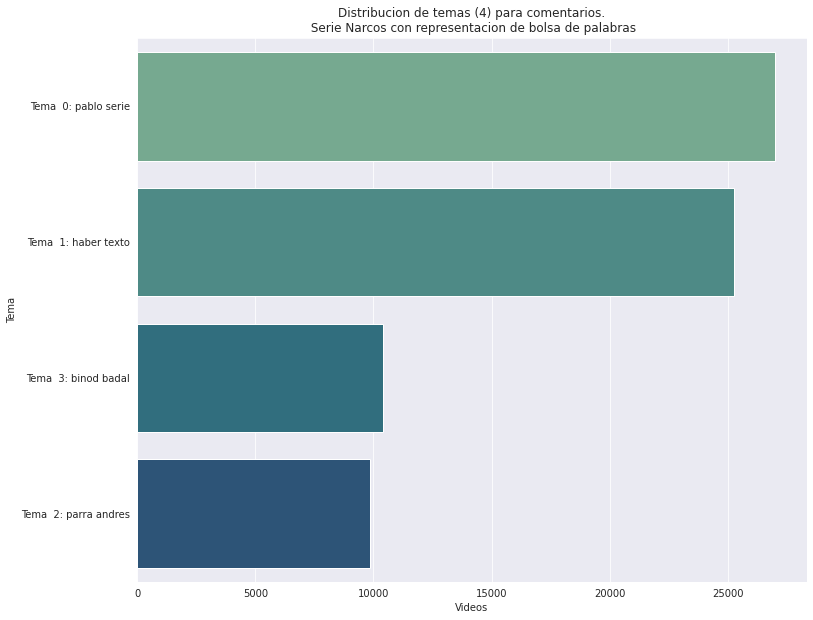

In [ ]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(figsize=(12,10))
plt.title('Distribucion de temas ({}) para {}.\n Serie {} con representacion de bolsa de palabras'.format(NewnumTopics1,datos,tv))
grafica1=sns.barplot(x='Videos', y='Tema',data=bolsa, palette="crest")
plt.show()

In [ ]:
grafica1.figure.savefig("/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/DOCUMENTS/YoutubeReport/"+carpeta+"/ModelToping/"+serie+"/DistribuciondeTemasconBolsaPalabras"+carpeta+serie+".png",bbox_inches='tight')

#### TF-IDF

##### Documento mas representativo para cada tema

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords3.groupby('TemaDominante(tf_idf)')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['ContribucionPorcentaje(tf_idf)'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)


# Show
sent_topics_sorteddf_mallet

,TemaDominante(Bigramas),ContribucionPorcentaje(Bigramas),PalabrasClave(Bigramas),TemaDominante(tf_idf),ContribucionPorcentaje(tf_idf),PalabrasClave(tf_idf),TemaDominante(BolsaPalabras),ContribucionPorcentaje(BolsaPalabras),PalabrasClave(BolsaPalabras),idVideo,...,ReplicarComentarioPrincipal,NombreAutorComentarioPrincipal,PaisComentarioPrincipal,URLAutorCanalComentarioPrincipal,idAutorCanalComentarioPrincipal,CalificacionEspectadorComentarioPrincipal,CalificarComentarioPrincipal,SolicitudComentarioPrincipal,ComentarioPrincipalModificadoLematizadoProfundo,Tokenizado
0,3.0,0.8338,"texto, no haber, pablo emilio, binod, escobar ...",0.0,0.4403,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.9963,"pablo, serie, escobar, si, patron, mal, hacer,...",4BgLwB8NZK8,...,True,ayex,NaN,http://www.youtube.com/channel/UCyHjuoC3M0IrQz...,UCyHjuoC3M0IrQzOlnU9qftw,none,True,1146,pablo escobar senor ir decir pablo emilio esco...,"[pablo, escobar, senor, ir, decir, pablo, emil..."


##### Distribución de temas en los documentos 

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords3['TemaDominante(tf_idf)'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_mallet[['TemaDominante(tf_idf)', 'PalabrasClave(tf_idf)']]

In [ ]:
x=pd.DataFrame(topic_counts).reset_index()
x.columns = ['TemaDominante(tf_idf)', 'ConteoDocumentos(tf_idf)']
x

,TemaDominante(tf_idf),ConteoDocumentos(tf_idf)
0,0.0,72493


In [ ]:
y=pd.DataFrame(topic_contribution).reset_index()
y.columns = ['TemaDominante(tf_idf)', 'PorcentajeDocumentos(tf_idf)']
y

,TemaDominante(tf_idf),PorcentajeDocumentos(tf_idf)
0,0.0,1.0


In [ ]:
w=pd.merge(x,y,left_on='TemaDominante(tf_idf)',right_on='TemaDominante(tf_idf)')
w

,TemaDominante(tf_idf),ConteoDocumentos(tf_idf),PorcentajeDocumentos(tf_idf)
0,0.0,72493,1.0


In [ ]:
z=topic_num_keywords
z

,TemaDominante(tf_idf),PalabrasClave(tf_idf)
0,0.0,"pablo, escobar, mejor, mal, si, ver, decir, ac..."


In [ ]:
df_dominant_topics=pd.merge(w,z,left_on='TemaDominante(tf_idf)',right_on='TemaDominante(tf_idf)')
df_dominant_topics

,TemaDominante(tf_idf),ConteoDocumentos(tf_idf),PorcentajeDocumentos(tf_idf),PalabrasClave(tf_idf)
0,0.0,72493,1.0,"pablo, escobar, mejor, mal, si, ver, decir, ac..."


In [ ]:
tf=df_dominant_topics[['TemaDominante(tf_idf)','ConteoDocumentos(tf_idf)']].sort_values(by='ConteoDocumentos(tf_idf)',ascending=False, ignore_index=True)
tf

,TemaDominante(tf_idf),ConteoDocumentos(tf_idf)
0,0.0,72493


In [ ]:
tf['TemaDominante(tf_idf)']=tf['TemaDominante(tf_idf)'].astype('int')
tf

,TemaDominante(tf_idf),ConteoDocumentos(tf_idf)
0,0,72493


In [ ]:
topic_names2

['Tema  0: pablo escobar',
 'Tema  1: haber no',
 'Tema  2: serie narcos',
 'Tema  3: patron popeye']

In [ ]:
dic_topic_names2={}
for i in range(len(topic_names2)):
  dic_topic_names2[i]=topic_names2[i]
dic_topic_names2

{0: 'Tema  0: pablo escobar',
 1: 'Tema  1: haber no',
 2: 'Tema  2: serie narcos',
 3: 'Tema  3: patron popeye'}

In [ ]:
list(dic_topic_names2.keys())

[0, 1, 2, 3]

In [ ]:
list(dic_topic_names2.values())

['Tema  0: pablo escobar',
 'Tema  1: haber no',
 'Tema  2: serie narcos',
 'Tema  3: patron popeye']

In [ ]:
diccionario_Final2={'TemaDominante(tf_idf)':list(dic_topic_names2.keys()),'Nombre Tema':list(dic_topic_names2.values())}
diccionario_Final2

{'TemaDominante(tf_idf)': [0, 1, 2, 3],
 'Nombre Tema': ['Tema  0: pablo escobar',
  'Tema  1: haber no',
  'Tema  2: serie narcos',
  'Tema  3: patron popeye']}

In [ ]:
temas2=pd.DataFrame(diccionario_Final2)
temas2

,TemaDominante(tf_idf),Nombre Tema
0,0,Tema 0: pablo escobar
1,1,Tema 1: haber no
2,2,Tema 2: serie narcos
3,3,Tema 3: patron popeye


In [ ]:
tf=pd.merge(tf,temas2,left_on='TemaDominante(tf_idf)',right_on='TemaDominante(tf_idf)')
tf

,TemaDominante(tf_idf),ConteoDocumentos(tf_idf),Nombre Tema
0,0,72493,Tema 0: pablo escobar


In [ ]:
tf.columns = ['Tema Dominante','Videos','Tema']

In [ ]:
tf

,Tema Dominante,Videos,Tema
0,0,72493,Tema 0: pablo escobar


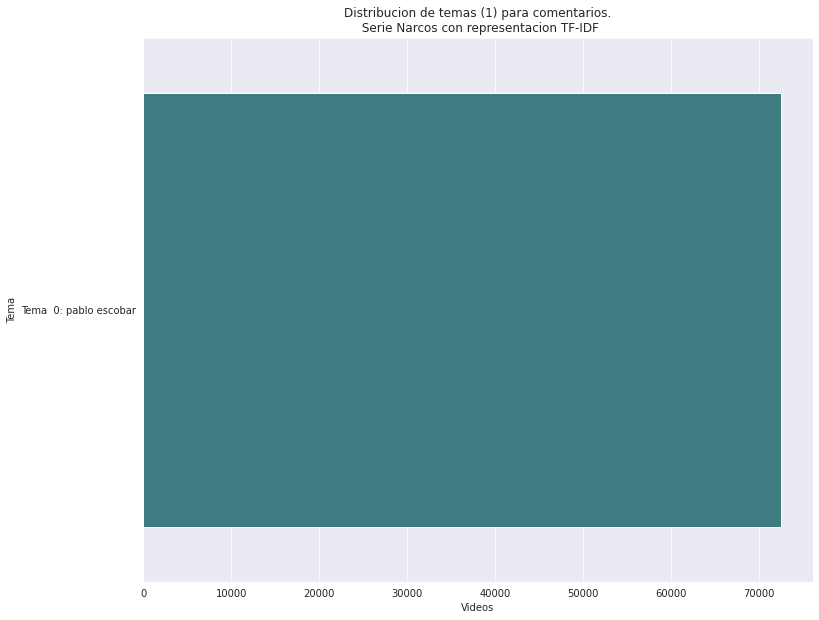

In [ ]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(figsize=(12,10))
plt.title('Distribucion de temas ({}) para {}.\n Serie {} con representacion TF-IDF'.format(NewnumTopics2,datos,tv))
grafica1=sns.barplot(x='Videos', y='Tema',data=tf, palette="crest")
plt.show()

In [ ]:
grafica1.figure.savefig("/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/DOCUMENTS/YoutubeReport/"+carpeta+"/ModelToping/"+serie+"/DistribuciondeTemasconTF_IDF"+carpeta+serie+".png",bbox_inches='tight')

#### Bigramas

##### Documento mas representativo para cada tema

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords3.groupby('TemaDominante(Bigramas)')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['ContribucionPorcentaje(Bigramas)'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)


# Show
sent_topics_sorteddf_mallet

,TemaDominante(Bigramas),ContribucionPorcentaje(Bigramas),PalabrasClave(Bigramas),TemaDominante(tf_idf),ContribucionPorcentaje(tf_idf),PalabrasClave(tf_idf),TemaDominante(BolsaPalabras),ContribucionPorcentaje(BolsaPalabras),PalabrasClave(BolsaPalabras),idVideo,...,ReplicarComentarioPrincipal,NombreAutorComentarioPrincipal,PaisComentarioPrincipal,URLAutorCanalComentarioPrincipal,idAutorCanalComentarioPrincipal,CalificacionEspectadorComentarioPrincipal,CalificarComentarioPrincipal,SolicitudComentarioPrincipal,ComentarioPrincipalModificadoLematizadoProfundo,Tokenizado
0,0.0,0.9941,"serie, ja, nao, netflix, bro, wagner moura, ba...",0.0,0.3808,"pablo, escobar, mejor, mal, si, ver, decir, ac...",2.0,0.9649,"parra, andres, serie, wagner, moura, pablo, de...",lc9awFnlIXI,...,True,Romario Almeida,NaN,http://www.youtube.com/channel/UCiDIUjX0baSjhG...,UCiDIUjX0baSjhGnHfSzkVcw,none,True,122,tiago tudo bom duas suestoes faca top dez seri...,"[tiago, tudo, bom, duas, suestoes, faca, top, ..."
1,1.0,0.9992,"serie, pablo escobar, si, pablo, mejor, hacer,...",0.0,0.4118,"pablo, escobar, mejor, mal, si, ver, decir, ac...",0.0,0.9947,"pablo, serie, escobar, si, patron, mal, hacer,...",KigLcSwkDv4,...,True,alberto orozco suarez,CO,http://www.youtube.com/channel/UCbGLlYYCoCsVVa...,UCbGLlYYCoCsVVaWfY6mN5bQ,none,True,957,ignorancia siempre sera atrevido aun si conven...,"[ignorancia, siempre, sera, atrevido, aun, si,..."
2,2.0,0.9996,"pablo, like, song, narcos, binod binod, pablo ...",0.0,0.4007,"pablo, escobar, mejor, mal, si, ver, decir, ac...",3.0,0.9998,"binod, badal, vikram, ke, berna, diabla, monca...",jMP1_gm1vXk,...,True,Helix art,IN,http://www.youtube.com/channel/UCKjdzmzp7HUjNb...,UCKjdzmzp7HUjNbDWrY_1Hpw,none,True,475,badal badal badal badal badal badal badal bada...,"[badal, badal, badal, badal, badal, badal, bad..."
3,3.0,0.9970,"texto, no haber, pablo emilio, binod, escobar ...",0.0,0.3877,"pablo, escobar, mejor, mal, si, ver, decir, ac...",1.0,0.9980,"haber, texto, no, pablo, song, like, played, e...",ueem03-AtoM,...,True,GANG BANG,NaN,http://www.youtube.com/channel/UCcu68vPRU7BF7h...,UCcu68vPRU7BF7huOptEalKw,none,True,515,dffcecadd cfada deaefacadd abfbea dafccadd cfb...,"[dffcecadd, cfada, deaefacadd, abfbea, dafccad..."


##### Distribución de temas en los documentos

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords3['TemaDominante(Bigramas)'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_mallet[['TemaDominante(Bigramas)', 'PalabrasClave(Bigramas)']]

In [ ]:
x=pd.DataFrame(topic_counts).reset_index()
x.columns = ['TemaDominante(Bigramas)', 'ConteoDocumentos(Bigramas)']
x

,TemaDominante(Bigramas),ConteoDocumentos(Bigramas)
0,1.0,26243
1,2.0,19777
2,3.0,15748
3,0.0,10725


In [ ]:
y=pd.DataFrame(topic_contribution).reset_index()
y.columns = ['TemaDominante(Bigramas)', 'PorcentajeDocumentos(Bigramas)']
y

,TemaDominante(Bigramas),PorcentajeDocumentos(Bigramas)
0,1.0,0.3620
1,2.0,0.2728
2,3.0,0.2172
3,0.0,0.1479


In [ ]:
w=pd.merge(x,y,left_on='TemaDominante(Bigramas)',right_on='TemaDominante(Bigramas)')
w

,TemaDominante(Bigramas),ConteoDocumentos(Bigramas),PorcentajeDocumentos(Bigramas)
0,1.0,26243,0.3620
1,2.0,19777,0.2728
2,3.0,15748,0.2172
3,0.0,10725,0.1479


In [ ]:
z=topic_num_keywords
z

,TemaDominante(Bigramas),PalabrasClave(Bigramas)
0,0.0,"serie, ja, nao, netflix, bro, wagner moura, ba..."
1,1.0,"serie, pablo escobar, si, pablo, mejor, hacer,..."
2,2.0,"pablo, like, song, narcos, binod binod, pablo ..."
3,3.0,"texto, no haber, pablo emilio, binod, escobar ..."


In [ ]:
df_dominant_topics=pd.merge(w,z,left_on='TemaDominante(Bigramas)',right_on='TemaDominante(Bigramas)')
df_dominant_topics

,TemaDominante(Bigramas),ConteoDocumentos(Bigramas),PorcentajeDocumentos(Bigramas),PalabrasClave(Bigramas)
0,1.0,26243,0.3620,"serie, pablo escobar, si, pablo, mejor, hacer,..."
1,2.0,19777,0.2728,"pablo, like, song, narcos, binod binod, pablo ..."
2,3.0,15748,0.2172,"texto, no haber, pablo emilio, binod, escobar ..."
3,0.0,10725,0.1479,"serie, ja, nao, netflix, bro, wagner moura, ba..."


In [ ]:
Bigramas=df_dominant_topics[['TemaDominante(Bigramas)','ConteoDocumentos(Bigramas)']].sort_values(by='ConteoDocumentos(Bigramas)',ascending=False, ignore_index=True)
Bigramas

,TemaDominante(Bigramas),ConteoDocumentos(Bigramas)
0,1.0,26243
1,2.0,19777
2,3.0,15748
3,0.0,10725


In [ ]:
Bigramas['TemaDominante(Bigramas)']=Bigramas['TemaDominante(Bigramas)'].astype('int')

In [ ]:
topic_names3

['Tema  0: serie ja',
 'Tema  1: serie pablo escobar',
 'Tema  2: pablo like',
 'Tema  3: texto no haber']

In [ ]:
dic_topic_names3={}
for i in range(len(topic_names3)):
  dic_topic_names3[i]=topic_names3[i]
dic_topic_names3

{0: 'Tema  0: serie ja',
 1: 'Tema  1: serie pablo escobar',
 2: 'Tema  2: pablo like',
 3: 'Tema  3: texto no haber'}

In [ ]:
list(dic_topic_names3.keys())

[0, 1, 2, 3]

In [ ]:
list(dic_topic_names3.values())

['Tema  0: serie ja',
 'Tema  1: serie pablo escobar',
 'Tema  2: pablo like',
 'Tema  3: texto no haber']

In [ ]:
diccionario_Final3={'TemaDominante(Bigramas)':list(dic_topic_names3.keys()),'Nombre Tema':list(dic_topic_names3.values())}
diccionario_Final3

{'TemaDominante(Bigramas)': [0, 1, 2, 3],
 'Nombre Tema': ['Tema  0: serie ja',
  'Tema  1: serie pablo escobar',
  'Tema  2: pablo like',
  'Tema  3: texto no haber']}

In [ ]:
temas3=pd.DataFrame(diccionario_Final3)
temas3

,TemaDominante(Bigramas),Nombre Tema
0,0,Tema 0: serie ja
1,1,Tema 1: serie pablo escobar
2,2,Tema 2: pablo like
3,3,Tema 3: texto no haber


In [ ]:
Bigramas=pd.merge(Bigramas,temas3,left_on='TemaDominante(Bigramas)',right_on='TemaDominante(Bigramas)')
Bigramas

,TemaDominante(Bigramas),ConteoDocumentos(Bigramas),Nombre Tema
0,1,26243,Tema 1: serie pablo escobar
1,2,19777,Tema 2: pablo like
2,3,15748,Tema 3: texto no haber
3,0,10725,Tema 0: serie ja


In [ ]:
Bigramas.columns = ['Tema Dominante','Videos','Tema']

In [ ]:
Bigramas

,Tema Dominante,Videos,Tema
0,1,26243,Tema 1: serie pablo escobar
1,2,19777,Tema 2: pablo like
2,3,15748,Tema 3: texto no haber
3,0,10725,Tema 0: serie ja


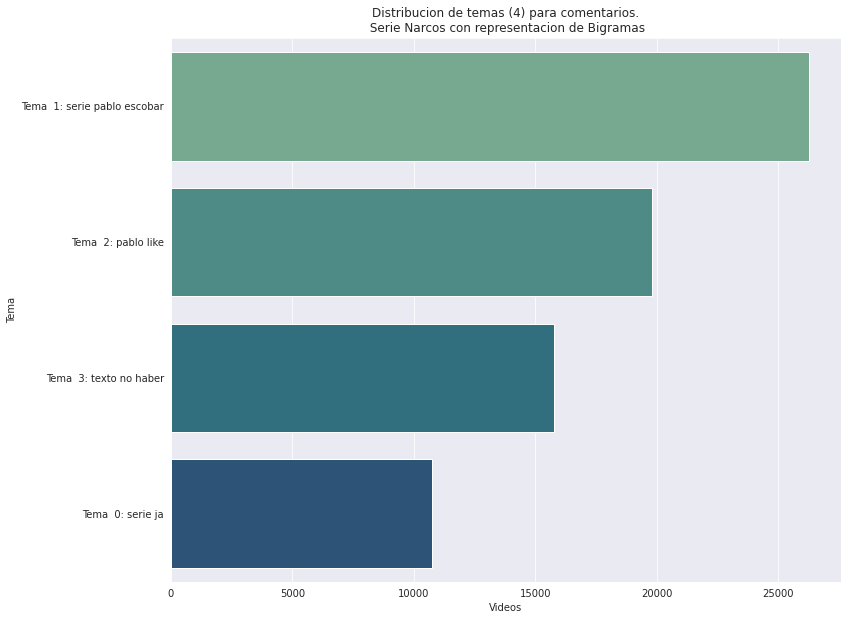

In [ ]:
fig, axes = plt.subplots(figsize=(12,10))
plt.title('Distribucion de temas ({}) para {}.\n Serie {} con representacion de Bigramas'.format(NewnumTopics3,datos,tv))
grafica1=sns.barplot(x='Videos', y='Tema',data=Bigramas, palette="crest")
plt.show()

In [ ]:
grafica1.figure.savefig("/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/DOCUMENTS/YoutubeReport/"+carpeta+"/ModelToping/"+serie+"/DistribuciondeTemasconBigramas"+carpeta+serie+".png",bbox_inches='tight')

### Clustering Chart

In [ ]:
MaxTopic=4

#### No se ejecuta si el numero de topicos es menor igual a 10

In [ ]:
from random import randint
mapa = []
n = MaxTopic 
for i in range(n):
    mapa.append('#%06X' % randint(0, 0xFFFFFF))

In [ ]:
mapa

['#BECEA4', '#445BC3', '#C800F2', '#E163A0']

In [ ]:
dibujo=[]
x=True
while(x==True):
  for i, marker in enumerate(MarkerType):
    dibujo.append(marker)
    if (len(dibujo)==n):
      x=False
      break

In [ ]:
len(dibujo)

4

In [ ]:
marcaAlterna={}
for i in range(len(dibujo)):
  marcaAlterna[i]=dibujo[i]

#### Diccionarios de temas

In [ ]:
diclabel1={}
j=0
for i in range(NumTopics1):
  diclabel1[i]='Tema '+str(j)
  j=j+1

In [ ]:
diclabel2={}
j=0
for i in range(NumTopics2):
  diclabel2[i]='Tema '+str(j)
  j=j+1

In [ ]:
diclabel3={}
j=0
for i in range(NumTopics3):
  diclabel3[i]='Tema '+str(j)
  j=j+1

#### Marca (30) y Colores (10)

In [ ]:
for i, marker in enumerate(MarkerType):
  print(marker)

asterisk
circle
circle_cross
circle_dot
circle_x
circle_y
cross
dash
diamond
diamond_cross
diamond_dot
dot
hex
hex_dot
inverted_triangle
plus
square
square_cross
square_dot
square_pin
square_x
star
star_dot
triangle
triangle_dot
triangle_pin
x
y


In [ ]:
dibujo=['asterisk','circle','diamond','star', 'triangle'\
        ,'square','plus','inverted_triangle','hex','circle_x'\
        ,'circle_y','diamond_dot','cross','triangle_dot','circle'\
        ,'circle','diamond','star', 'triangle','square'\
        ,'plus','inverted_triangle','hex','circle_x','circle_y'\
        ,'diamond_dot','square','triangle_dot','circle','circle']
len(dibujo)
marca={}
for i in range(len(dibujo)):
  marca[i]=dibujo[i]

In [ ]:
len(dibujo)

30

In [ ]:
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
len(mycolors)

10

#### Reduccion de dimensionalidad

###### Matrices

In [ ]:
a1 = np.zeros((len(lda_model1.get_document_topics(bow=corpus)), NumTopics1))
a2 = np.zeros((len(lda_model2.get_document_topics(bow=corpus_tfidf)), NumTopics2))
a3 = np.zeros((len(lda_model3.get_document_topics(bow=corpus_bigrams)), NumTopics3))

In [ ]:
for i in range(len(documentos1)):
  for j in range(len(documentos1[i])):
    x,y=documentos1[i][j]
    a1[i][x]=y

In [ ]:
for i in range(len(documentos2)):
  for j in range(len(documentos2[i])):
    x,y=documentos2[i][j]
    a2[i][x]=y

In [ ]:
for i in range(len(documentos3)):
  for j in range(len(documentos3[i])):
    x,y=documentos3[i][j]
    a3[i][x]=y

In [ ]:
a1

array([[0.96537381, 0.01812939, 0.        , 0.        ],
       [0.98212367, 0.        , 0.        , 0.        ],
       [0.11332322, 0.07240722, 0.03664165, 0.77762789],
       ...,
       [0.49607807, 0.48362067, 0.01129059, 0.        ],
       [0.97481376, 0.01318689, 0.        , 0.        ],
       [0.98370051, 0.        , 0.        , 0.        ]])

In [ ]:
a2

array([[0.40584227, 0.18472484, 0.25264972, 0.15678319],
       [0.42327568, 0.1810576 , 0.24699505, 0.14867163],
       [0.40322375, 0.18763341, 0.25506282, 0.15408006],
       ...,
       [0.40547383, 0.18876387, 0.25565669, 0.15010561],
       [0.41210714, 0.18802628, 0.24811618, 0.15175039],
       [0.40859616, 0.1821633 , 0.25984263, 0.14939791]])

In [ ]:
a3

array([[0.01257605, 0.94590843, 0.02274911, 0.01876643],
       [0.        , 0.97458458, 0.01068898, 0.        ],
       [0.03893295, 0.134276  , 0.07043316, 0.75635785],
       ...,
       [0.01257605, 0.49448958, 0.47416803, 0.01876631],
       [0.        , 0.96272945, 0.01567479, 0.0129305 ],
       [0.        , 0.87386912, 0.11281617, 0.        ]])

In [ ]:
a1.shape

(72493, 4)

In [ ]:
a2.shape

(72493, 4)

In [ ]:
a3.shape

(72493, 4)

In [ ]:
# Dominant topic number in each doc
topic_num1 = np.argmax(a1, axis=1)
topic_num2 = np.argmax(a2, axis=1)
topic_num3 = np.argmax(a3, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, random_state=100, init='pca',n_iter=2000)

##### Representacion bolsa de palabras

In [ ]:
tsne_lda1 = tsne_model.fit_transform(a1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
topic_num1.shape

(72493,)

In [ ]:
topic_num1

array([0, 0, 3, ..., 0, 0, 0])

In [ ]:
np.unique(topic_num1)

array([0, 1, 2, 3])

In [ ]:
NewnumTopics1=len(np.unique(topic_num1))
NewnumTopics1

4

In [ ]:
x1=tsne_lda1[:,0]
len(x1)
y1=tsne_lda1[:,1]
len(y1)

72493

###### Dataframe de representacion bolsa de palabras (Graficas)

In [ ]:
df1 = pd.DataFrame(dict(x=tsne_lda1[:,0], y=tsne_lda1[:,1], label=topic_num1))
groups1 = df1.groupby('label')
df1

,x,y,label
0,-56.305405,-90.680542,0
1,-101.794968,9.558501,0
2,25.839155,48.296978,3
3,25.838610,48.295517,3
4,-38.642662,19.049574,0
...,...,...,...
72488,25.114946,16.830551,1
72489,-44.596706,-115.223724,0
72490,-0.175637,-71.672516,0
72491,-77.626999,-51.219082,0


##### Representacion TF-IDF

In [ ]:
tsne_lda2 = tsne_model.fit_transform(a2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
topic_num2.shape

(72493,)

In [ ]:
topic_num2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(topic_num2)

array([0])

In [ ]:
NewnumTopics2=len(np.unique(topic_num2))
NewnumTopics2

1

In [ ]:
x2=tsne_lda2[:,0]
len(x2)
y2=tsne_lda2[:,1]
len(y2)

72493

###### Dataframe de representacion TF-IDF (Graficas)

In [ ]:
df2 = pd.DataFrame(dict(x=tsne_lda2[:,0], y=tsne_lda2[:,1], label=topic_num2))
groups2 = df2.groupby('label')
df2

,x,y,label
0,-11.042781,4.694248,0
1,-111.090889,-63.959896,0
2,28.587404,0.144860,0
3,28.587599,0.144608,0
4,-60.676010,-125.567078,0
...,...,...,...
72488,-50.411034,31.599018,0
72489,-68.525505,40.585827,0
72490,12.926894,35.238819,0
72491,-53.207436,51.586784,0


##### Representacion Bigramas

In [ ]:
tsne_lda3 = tsne_model.fit_transform(a3)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
topic_num3.shape

(72493,)

In [ ]:
topic_num3

array([1, 1, 3, ..., 1, 1, 1])

In [ ]:
np.unique(topic_num3)

array([0, 1, 2, 3])

In [ ]:
NewnumTopics3=len(np.unique(topic_num3))
NewnumTopics3

4

In [ ]:
x3=tsne_lda3[:,0]
len(x3)
y3=tsne_lda3[:,1]
len(y3)

72493

###### Dataframe de representacion Bigramas (Graficas)

In [ ]:
df3 = pd.DataFrame(dict(x=tsne_lda3[:,0], y=tsne_lda3[:,1], label=topic_num3))
groups3 = df3.groupby('label')
df3

,x,y,label
0,85.586906,24.547029,1
1,95.622276,-104.266815,1
2,53.529675,138.512466,3
3,53.519905,138.514359,3
4,17.262920,-6.156734,1
...,...,...,...
72488,-74.757538,20.598648,3
72489,69.188820,-66.573158,1
72490,11.375215,-105.388016,1
72491,100.693047,-72.060509,1


### Graficas

#### Bolsa de palabras

In [ ]:
# Plot the Topic Clusters using Bokeh
output_notebook()
plot = figure(title="Cluster con t-SNE  de {} temas para {}.\n Serie {} con representacion de bolsa de palabras".format(NewnumTopics1,datos,tv),plot_width=700, plot_height=700)
for name, group in groups1:
  plot.scatter(x=group.x, y=group.y, color=mycolors[name], legend_label=diclabel1[name], alpha=0.7, marker=marca[name], size=8, line_color="black", line_width=0.5)
plot.legend.label_text_font_size = '12pt'
show(plot)

#### TF-IDF

In [ ]:
# Plot the Topic Clusters using Bokeh
output_notebook()
plot = figure(title="Cluster con t-SNE  de {} temas para {}.\n Serie {} con representacion TF-IDF".format(NewnumTopics2,datos,tv),plot_width=700, plot_height=700)
for name, group in groups2:
  plot.scatter(x=group.x, y=group.y, color=mycolors[name], legend_label=diclabel2[name], alpha=0.7, marker=marca[name], size=8, line_color="black", line_width=0.5)
plot.legend.label_text_font_size = '12pt'
show(plot)

#### Bigramas

In [ ]:
# Plot the Topic Clusters using Bokeh
output_notebook()
plot = figure(title="Cluster con t-SNE  de {} temas para {}.\n Serie {} con representacion de bigramas".format(NewnumTopics3,datos,tv),plot_width=700, plot_height=750)
for name, group in groups3:
  plot.scatter(x=group.x, y=group.y, color=mycolors[name], legend_label=diclabel3[name], alpha=0.7, marker=marca[name], size=8, line_color="black", line_width=0.5)
plot.legend.label_text_font_size = '12pt'
show(plot)